In [1]:
#Basic Modules
import pandas as pd
import numpy as np
#plots
import seaborn as sns
import plotly.graph_objects as go
#Data Handling
from sklearn.preprocessing import (Normalizer,StandardScaler,MinMaxScaler)
from sklearn.preprocessing import OneHotEncoder

# Genetic Modules
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestClassifier
from matplotlib import rcParams
from cycler import cycler
#Log Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score,
                             f1_score,balanced_accuracy_score)
#Naive Bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay,r2_score
# Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt

import pickle 

In [2]:
route = 'C:/Users/Emilio/Desktop/TOG Exp/Datasets/'
# data = pd.read_parquet(route+'ohlcV.parquet')
# data = pd.read_parquet(route+'ohlc-2017.parquet')
data = pd.read_parquet(route + 'ohlc-2021.parquet')
#data = pd.read_parquet(route + 'ohlc1.parquet')
data = data.drop(['drop', 'close_time'], axis=1)
data.head()

open      high       low     close     volume  \
timestamp                                                                
2021-01-01 00:00:00  28923.63  28961.66  28913.12  28961.66  27.457032   
2021-01-01 00:01:00  28961.67  29017.50  28961.01  29009.91  58.477501   
2021-01-01 00:02:00  29009.54  29016.71  28973.58  28989.30  42.470329   
2021-01-01 00:03:00  28989.68  28999.85  28972.33  28982.69  30.360677   
2021-01-01 00:04:00  28982.67  28995.93  28971.80  28975.65  24.124339   

                     quote_asset_volume  trades  buy_asset_volume  \
timestamp                                                           
2021-01-01 00:00:00        7.943820e+05    1292         16.777195   
2021-01-01 00:01:00        1.695803e+06    1651         33.733818   
2021-01-01 00:02:00        1.231359e+06     986         13.247444   
2021-01-01 00:03:00        8.800168e+05     959          9.456028   
2021-01-01 00:04:00        6.992262e+05     726          6.814644   

                     taker_buy_asset_volume  
timestamp                                    
2021-01-01 00:00:00           485390.826825  
2021-01-01 00:01:00           978176.468202  
2021-01-01 00:02:00           384076.854453  
2021-01-01 00:03:00           274083.075142  
2021-01-01 00:04:00           197519.374888

In [3]:
print(data.shape)
print(data.isnull().sum())

(962367, 9)
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
trades                    0
buy_asset_volume          0
taker_buy_asset_volume    0
dtype: int64


In [4]:
# %% Quick description of the data
desc = data.describe()
info = data.info()
print(desc, info)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962367 entries, 2021-01-01 00:00:00 to 2022-10-31 23:59:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open                    962367 non-null  float64
 1   high                    962367 non-null  float64
 2   low                     962367 non-null  float64
 3   close                   962367 non-null  float64
 4   volume                  962367 non-null  float64
 5   quote_asset_volume      962367 non-null  float64
 6   trades                  962367 non-null  int64  
 7   buy_asset_volume        962367 non-null  float64
 8   taker_buy_asset_volume  962367 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 73.4 MB
                open           high            low          close  \
count  962367.000000  962367.000000  962367.000000  962367.000000   
mean    39651.462393   39678.499365   39624.563856   39651.451460   
std 

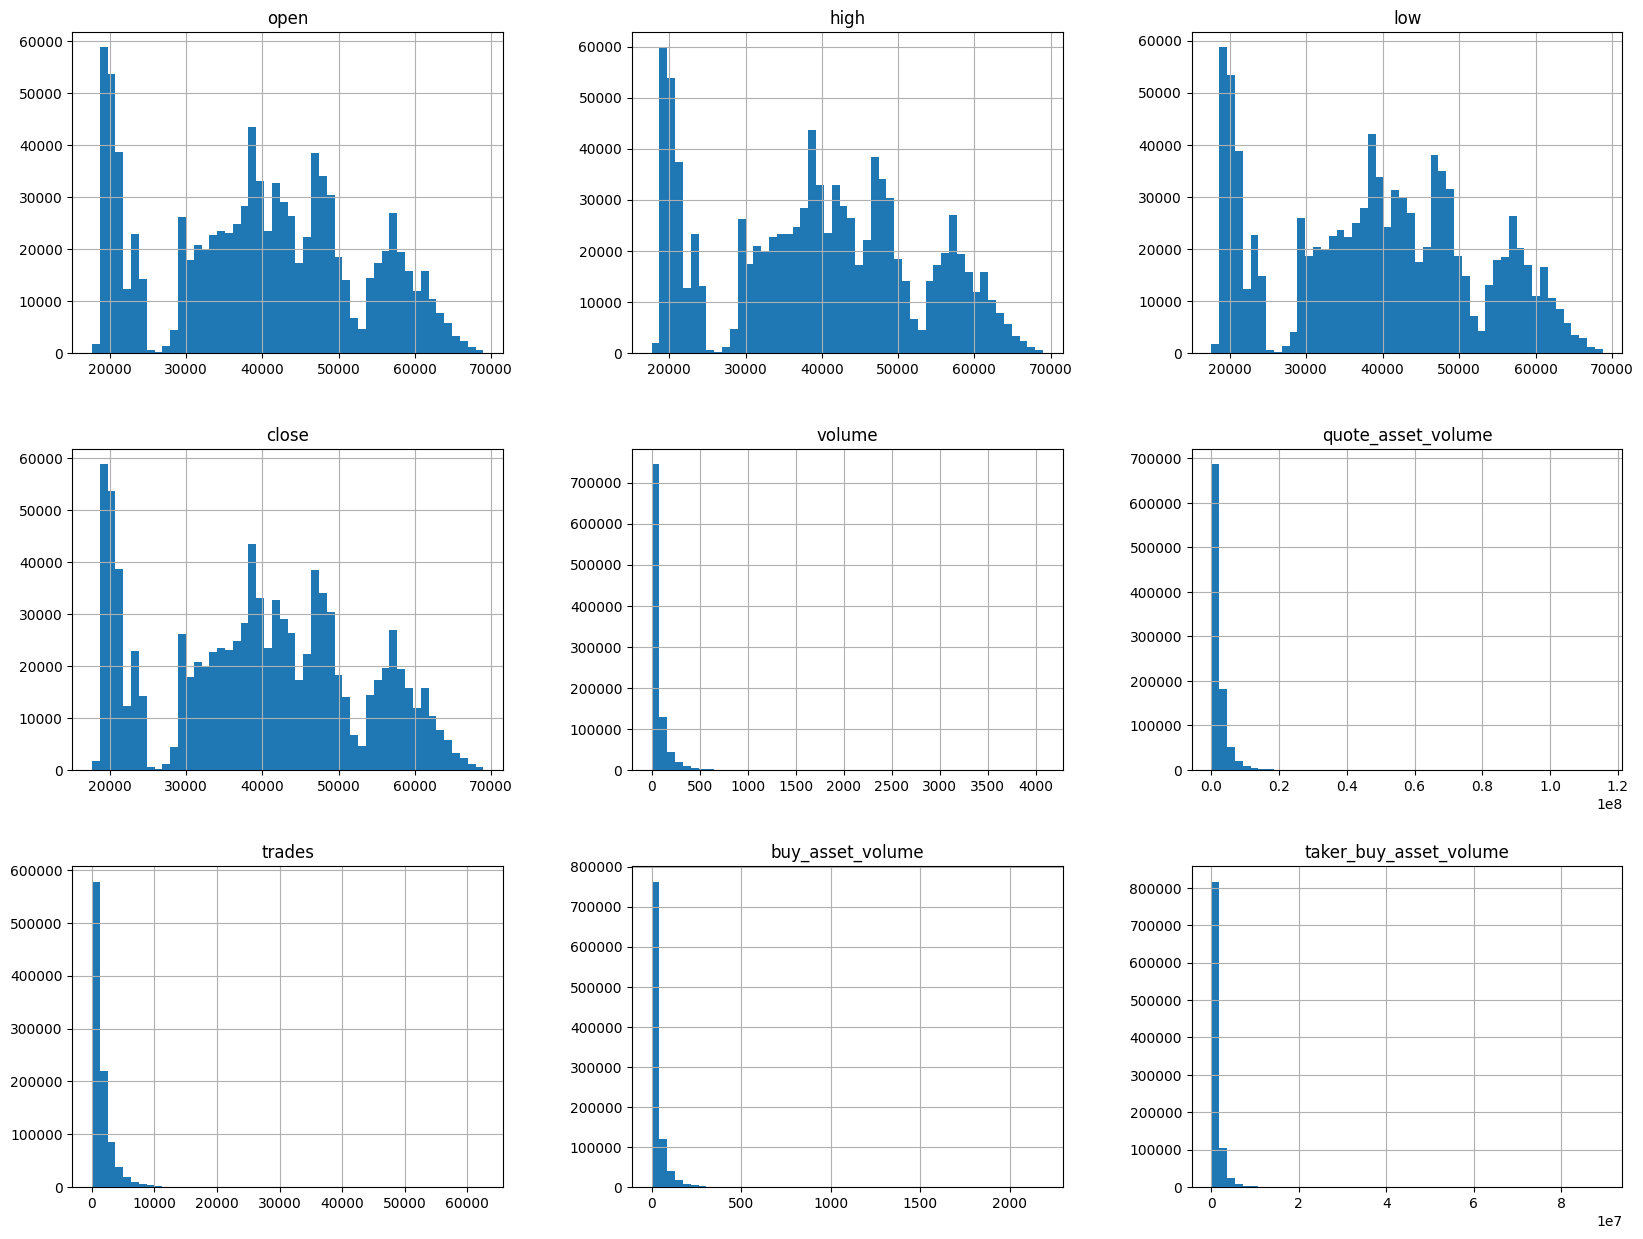

<AxesSubplot:xlabel='timestamp'>

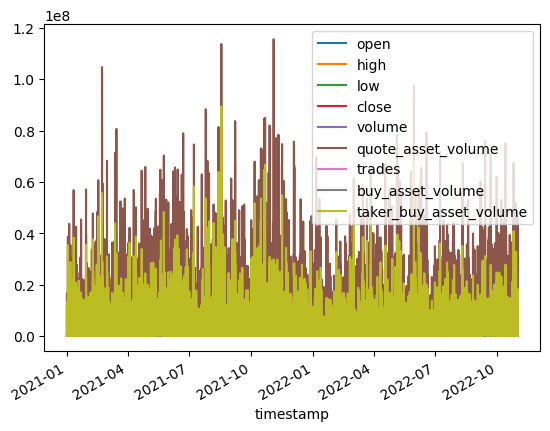

In [5]:
# %matplotlib inline
data.hist(bins=50, figsize=(20, 15))
plt.show()

data.plot()

In [6]:
# %% Resampling
rs = '8H'
data1 = data.copy()
data1['open'] = data1['open'].resample(rs).first()
data1['high'] = data1['high'].resample(rs).max()
data1['low'] = data1['low'].resample(rs).min()
data1['close'] = data1['close'].resample(rs).last()
data1['volume'] = data1['volume'].resample(rs).sum()
data1['quote_asset_volume'] = data1['quote_asset_volume'].resample(rs).sum()
data1['trades'] = data1['trades'].resample(rs).sum()
data1['buy_asset_volume'] = data1['buy_asset_volume'].resample(rs).sum()
data1['taker_buy_asset_volume'] = data1['taker_buy_asset_volume'].resample(rs).sum()
data1 = data1.resample(rs).sum()
print(data1.shape)
data1.head()


(2007, 9)


open     high       low     close        volume  \
timestamp                                                                  
2021-01-01 00:00:00  28923.63  29470.0  28690.17  29092.83  18869.366827   
2021-01-01 08:00:00  29092.84  29600.0  28872.24  29188.67  20078.654834   
2021-01-01 16:00:00  29188.67  29360.0  28624.57  29331.69  15234.903350   
2021-01-02 00:00:00  29331.70  29820.5  28946.53  29750.00  17258.671371   
2021-01-02 08:00:00  29751.47  31800.0  29473.91  31691.29  43255.778007   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2021-01-01 00:00:00        5.506899e+08  459213.0       9791.803354   
2021-01-01 08:00:00        5.881064e+08  464924.0      10504.194598   
2021-01-01 16:00:00        4.437308e+08  390773.0       7159.803773   
2021-01-02 00:00:00        5.082743e+08  368887.0      10013.456032   
2021-01-02 08:00:00        1.325303e+09  766849.0      23128.632863   

                     taker_buy_asset_volume  
timestamp                                    
2021-01-01 00:00:00            2.858462e+08  
2021-01-01 08:00:00            3.077598e+08  
2021-01-01 16:00:00            2.086418e+08  
2021-01-02 00:00:00            2.951695e+08  
2021-01-02 08:00:00            7.083531e+08

In [7]:
# %% Feature Engineering

ohlcv = data1.copy()
# OHLC Chart
fig = go.Figure(data=go.Ohlc(x=ohlcv.index,
                             open=ohlcv['open'],
                             high=ohlcv['high'],
                             low=ohlcv['low'],
                             close=ohlcv['close']))

fig.show()


In [8]:
# Volatility
volatility = []
for i in range(len(ohlcv)):
    vol = ohlcv['high'][i] - ohlcv['low'][i]
    volatility.append(vol)
ohlcv['volatility'] = volatility

# micro trends
high_open = []
for i in range(len(ohlcv)):
    ho = ohlcv['high'][i] - ohlcv['open'][i]
    high_open.append(ho)
ohlcv['high_open'] = high_open

open_low = []
for i in range(len(ohlcv)):
    ol = ohlcv['open'][i] - ohlcv['low'][i]
    open_low.append(ol)
ohlcv['open_low'] = open_low

close_open = []
for i in range(len(ohlcv)):
    co = ohlcv['close'][i] - ohlcv['open'][i]
    close_open.append(co)
ohlcv['close_open'] = close_open
ohlcv.head()

ohlcv2 = ohlcv.copy()
ohlcv2.head()

open     high       low     close        volume  \
timestamp                                                                  
2021-01-01 00:00:00  28923.63  29470.0  28690.17  29092.83  18869.366827   
2021-01-01 08:00:00  29092.84  29600.0  28872.24  29188.67  20078.654834   
2021-01-01 16:00:00  29188.67  29360.0  28624.57  29331.69  15234.903350   
2021-01-02 00:00:00  29331.70  29820.5  28946.53  29750.00  17258.671371   
2021-01-02 08:00:00  29751.47  31800.0  29473.91  31691.29  43255.778007   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2021-01-01 00:00:00        5.506899e+08  459213.0       9791.803354   
2021-01-01 08:00:00        5.881064e+08  464924.0      10504.194598   
2021-01-01 16:00:00        4.437308e+08  390773.0       7159.803773   
2021-01-02 00:00:00        5.082743e+08  368887.0      10013.456032   
2021-01-02 08:00:00        1.325303e+09  766849.0      23128.632863   

                     taker_buy_asset_volume  volatility  high_open  open_low  \
timestamp                                                                      
2021-01-01 00:00:00            2.858462e+08      779.83     546.37    233.46   
2021-01-01 08:00:00            3.077598e+08      727.76     507.16    220.60   
2021-01-01 16:00:00            2.086418e+08      735.43     171.33    564.10   
2021-01-02 00:00:00            2.951695e+08      873.97     488.80    385.17   
2021-01-02 08:00:00            7.083531e+08     2326.09    2048.53    277.56   

                     close_open  
timestamp                        
2021-01-01 00:00:00      169.20  
2021-01-01 08:00:00       95.83  
2021-01-01 16:00:00      143.02  
2021-01-02 00:00:00      418.30  
2021-01-02 08:00:00     1939.82

In [50]:
symbolic_params = {'functions': ["sub", "add", 'inv', 'mul', 'div', 'abs', 'log','sqrt'],
        'population': 12000, 'tournament':3000, 'hof': 30, 'generations': 5, 'n_features':20,
        'init_depth': (4,8), 'init_method': 'half and half', 'parsimony': 0.1, 'constants': None,
        'metric': 'pearson', 'metric_goal': 0.65, 
        'prob_cross': 0.4, 'prob_mutation_subtree': 0.5,
        'prob_mutation_hoist': 0.05, 'prob_mutation_point': 0.05,
        'verbose': True, 'random_cv': None, 'parallelization': True, 'warm_start': True }

In [10]:
# %% Rolling stats
ohlcv2 = ohlcv2.drop(['quote_asset_volume', 'buy_asset_volume', 'taker_buy_asset_volume', 'trades'], axis=1)

def autoregressive_features(p_data, p_memory):
    """
    Creacion de variables de naturaleza autoregresiva (resagos, promedios, diferencias)
    Parameters
    ----------
    p_data: pd.DataFrame
        with OHLCV columns: Open, High, Low, Close, Volume
    p_memory: int
        A value that represents the implicit assumption of a "memory" effect in the prices
    Returns
    -------
    r_features: pd.DataFrame

    """

    # work with a separate copy of original data
    data = ohlcv2.copy()

    # nth-period final price "movement"
    data['co'] = (data['close'] - data['open'])
    # nth-period uptrend movement
    data['ho'] = (data['high'] - data['open'])
    # nth-period downtrend movement
    data['ol'] = (data['open'] - data['low'])
    # nth-period volatility measure
    data['hl'] = (data['high'] - data['low'])

    # N features with window-based calculations
    for n in range(0, p_memory):
        data['ma_ol'] = data['ol'].rolling(n + 2).mean()
        data['ma_ho'] = data['ho'].rolling(n + 2).mean()
        data['ma_hl'] = data['hl'].rolling(n + 2).mean()

        data['lag_ol_' + str(n + 1)] = data['ol'].shift(n + 1)
        data['lag_ho_' + str(n + 1)] = data['ho'].shift(n + 1)
        data['lag_hl_' + str(n + 1)] = data['hl'].shift(n + 1)

        data['sd_ol_' + str(n + 1)] = data['ol'].rolling(n + 1).std()
        data['sd_ho_' + str(n + 1)] = data['ho'].rolling(n + 1).std()
        data['sd_hl_' + str(n + 1)] = data['hl'].rolling(n + 1).std()

        data['lag_vol_' + str(n + 1)] = data['volume'].shift(n + 1)
        data['sum_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).sum()
        data['mean_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).mean()

    # timestamp as index
    data.index = pd.to_datetime(data.index)
    # select columns, drop for NAs, change column types, reset index
    r_features = data.drop(['open', 'high', 'low', 'close', 'hl', 'ol', 'ho', 'volume'], axis=1)
    r_features = r_features.dropna(axis='columns', how='all')
    # r_features = r_features.dropna(axis='rows')
    r_features.iloc[:, 1:] = r_features.iloc[:, 1:].astype(float)
    r_features.reset_index(inplace=True, drop=True)

    return r_features

In [11]:
def symbolic_features(p_x, p_y, p_params):
    """
    Feature engineering process with symbolic variables by using genetic programming. 
    Parameters
    ----------
    p_x: pd.DataFrame / np.array / list
        with regressors or predictor variables
        p_x = data_features.iloc[:, 1:]
    p_y: pd.DataFrame / np.array / list
        with variable to predict
        p_y = data_features.iloc[:, 0]
    p_params: dict
        with parameters for the genetic programming function
        p_params = {'functions': ["sub", "add", 'inv', 'mul', 'div', 'abs', 'log'],
        'population': 5000, 'tournament':20, 'hof': 20, 'generations': 5, 'n_features':20,
        'init_depth': (4,8), 'init_method': 'half and half', 'parsimony': 0.1, 'constants': None,
        'metric': 'pearson', 'metric_goal': 0.65, 
        'prob_cross': 0.4, 'prob_mutation_subtree': 0.3,
        'prob_mutation_hoist': 0.1. 'prob_mutation_point': 0.2,
        'verbose': True, 'random_cv': None, 'parallelization': True, 'warm_start': True }
    Returns
    -------
    results: dict
        With response information
        {'fit': model fitted, 'params': model parameters, 'model': model,
         'data': generated data with variables, 'best_programs': models best programs}
    References
    ----------
    https://gplearn.readthedocs.io/en/stable/reference.html#gplearn.genetic.SymbolicTransformer
    
    
    **** NOTE ****
    simplified internal calculation for correlation (asuming w=1)
    
    y_pred_demean = y_pred - np.average(y_pred)
    y_demean = y - np.average(y)
                              np.sum(y_pred_demean * y_demean)
    pearson =  ---------------------------------------------------------------
                np.sqrt((np.sum(y_pred_demean ** 2) * np.sum(y_demean ** 2)))  
    """
     
    # Function to produce Symbolic Features
    model = SymbolicTransformer(function_set=p_params['functions'], population_size=p_params['population'],
                                tournament_size=p_params['tournament'], hall_of_fame=p_params['hof'],
                                generations=p_params['generations'], n_components=p_params['n_features'],

                                init_depth=p_params['init_depth'], init_method=p_params['init_method'],
                                parsimony_coefficient=p_params['parsimony'],
                                const_range=p_params['constants'],
                                
                                metric=p_params['metric'], stopping_criteria=p_params['metric_goal'],

                                p_crossover=p_params['prob_cross'],
                                p_subtree_mutation=p_params['prob_mutation_subtree'],
                                p_hoist_mutation=p_params['prob_mutation_hoist'],
                                p_point_mutation=p_params['prob_mutation_point'],
                                max_samples=1,

                                verbose=p_params['verbose'], warm_start=p_params['warm_start'],
                                random_state=123, n_jobs=-1 if p_params['parallelization'] else 1,
                                feature_names=p_x.columns)

    # SymbolicTransformer fit
    model_fit = model.fit_transform(p_x, p_y)

    # output data of the model
    data = pd.DataFrame(model_fit)

    # parameters of the model
    model_params = model.get_params()

    # best programs dataframe
    best_programs = {}
    for p in model._best_programs:
        factor_name = 'sym' + str(model._best_programs.index(p))
        best_programs[factor_name] = {'raw_fitness': p.raw_fitness_, 'reg_fitness': p.fitness_, 
                                      'expression': str(p), 'depth': p.depth_, 'length': p.length_}

    # format and sorting
    best_programs = pd.DataFrame(best_programs).T
    best_programs = best_programs.sort_values(by='raw_fitness', ascending=False)

    # results
    results = {'fit': model_fit, 'params': model_params, 'model': model, 'data': data,
               'best_programs': best_programs, 'details': model.run_details_}

    return results


In [12]:
def genetic_programed_features(p_data, p_target, p_params):
    """
    El uso de programacion genetica para generar variables independientes simbolicas
    Parameters
    ----------
    p_data: pd.DataFrame
        con datos completos para ajustar modelos
        
        p_data = m_folds['periodo_1']
    p_split: int
        split in val
        p_split = '0'
    p_params:
        parameters for symbolic_features process 
    Returns
    -------
    model_data: dict
        {'train_x': pd.DataFrame, 'train_y': pd.DataFrame, 'val_x': pd.DataFrame, 'val_y': pd.DataFrame}
    References
    ----------
    https://stackoverflow.com/questions/3819977/
    what-are-the-differences-between-genetic-algorithms-and-genetic-programming
    """
   
    # separacion de variable dependiente
    datos_y = y.copy().astype(int)

    # separacion de variables independientes
    datos_had = X.copy()
    # Lista de operaciones simbolicas
    sym_data = symbolic_features(p_x=datos_had, p_y=datos_y, p_params=symbolic_params)

    # Symbolic variables output
    datos_sym = sym_data['data'].copy()
    datos_sym.columns = ['sym_' + str(i) for i in range(0, len(sym_data['data'].iloc[0, :]))]
    datos_sym.index = datos_y.index
   
    return {'sym_data': sym_data, 'sym_features': datos_sym}


In [13]:
p_memory = 24
data_ar = autoregressive_features(p_data=ohlcv2, p_memory=p_memory)
data_ar.index = ohlcv2.index

C:\Users\Emilio\AppData\Local\Temp\ipykernel_21880\3380875049.py:39: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_21880\3380875049.py:41: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_21880\3380875049.py:42: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [16]:
ohlcv = pd.merge(ohlcv,data_ar, on='timestamp')
ohlcv = ohlcv.dropna(axis='rows')
ohlcv

open      high       low     close         volume  \
timestamp                                                                    
2021-01-09 00:00:00  40586.96  40976.13  38720.00  39638.61   26339.845504   
2021-01-09 08:00:00  39639.21  41380.00  39290.86  40525.15   28331.829551   
2021-01-09 16:00:00  40525.16  40880.00  39869.00  40088.22   21114.304620   
2021-01-10 00:00:00  40088.22  41350.00  40050.00  40978.57   20997.296844   
2021-01-10 08:00:00  40978.57  41060.00  38450.00  39671.81   35971.957987   
...                       ...       ...       ...       ...            ...   
2022-10-30 08:00:00  20850.84  20887.34  20589.18  20676.70   76836.129770   
2022-10-30 16:00:00  20676.72  20739.00  20515.00  20627.48   59224.988760   
2022-10-31 00:00:00  20627.48  20675.00  20427.23  20546.65   68309.725380   
2022-10-31 08:00:00  20547.08  20845.92  20237.95  20401.53  148483.503110   
2022-10-31 16:00:00  20402.60  20533.00  20328.68  20490.74   86774.387790   

                     quote_asset_volume     trades  buy_asset_volume  \
timestamp                                                              
2021-01-09 00:00:00        1.049858e+09   689992.0      13179.895302   
2021-01-09 08:00:00        1.151469e+09   734361.0      14306.051097   
2021-01-09 16:00:00        8.534520e+08   573803.0       9521.375510   
2021-01-10 00:00:00        8.550744e+08   582077.0      10977.859896   
2021-01-10 08:00:00        1.432985e+09   829308.0      15653.189864   
...                                 ...        ...               ...   
2022-10-30 08:00:00        1.592142e+09  1948298.0      38104.743320   
2022-10-30 16:00:00        1.221969e+09  1369320.0      29338.226500   
2022-10-31 00:00:00        1.402119e+09  1699697.0      34125.256280   
2022-10-31 08:00:00        3.052348e+09  3053823.0      73524.410160   
2022-10-31 16:00:00        1.771837e+09  1818006.0      43572.630010   

                     taker_buy_asset_volume  volatility_x  ...   mean_vol_23  \
timestamp                                                  ...                 
2021-01-09 00:00:00            5.255339e+08       2256.13  ...  41270.910041   
2021-01-09 08:00:00            5.814863e+08       2089.14  ...  41840.341615   
2021-01-09 16:00:00            3.849705e+08       1011.00  ...  42007.977843   
2021-01-10 00:00:00            4.472088e+08       1300.00  ...  41040.217792   
2021-01-10 08:00:00            6.233926e+08       2610.00  ...  39583.371445   
...                                     ...           ...  ...           ...   
2022-10-30 08:00:00            7.896142e+08        298.16  ...  92792.375397   
2022-10-30 16:00:00            6.053755e+08        224.00  ...  93995.446487   
2022-10-31 00:00:00            7.004657e+08        247.77  ...  95330.852354   
2022-10-31 08:00:00            1.511555e+09        607.97  ...  97529.810850   
2022-10-31 16:00:00            8.897572e+08        204.32  ...  97330.971079   

                     lag_ol_24  lag_ho_24  lag_hl_24     sd_ol_24    sd_ho_24  \
timestamp                                                                       
2021-01-09 00:00:00     233.46     546.37     779.83  1005.532143  877.979068   
2021-01-09 08:00:00     220.60     507.16     727.76  1000.559509  874.630363   
2021-01-09 16:00:00     564.10     171.33     735.43   998.248947  865.965672   
2021-01-10 00:00:00     385.17     488.80     873.97  1012.801456  852.161796   
2021-01-10 08:00:00     277.56    2048.53    2326.09  1030.205993  865.928795   
...                        ...        ...        ...          ...         ...   
2022-10-30 08:00:00      23.58      93.42     117.00   100.838762  210.453942   
2022-10-30 16:00:00     100.80      14.05     114.85   100.702445  208.706243   
2022-10-31 00:00:00      56.28      17.42      73.70    99.925581  207.561870   
2022-10-31 08:00:00      92.05      50.98     143.03   104.753857  205.193743   
2022-10-31 16:00:00      20.96     504.86     525.82   102.3

In [17]:
# Target 
# %% Target Engineering y_hat:CO_{t}
treshold = 300

ohlc = pd.DataFrame(ohlcv)

y_hat = []

for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    y_hat.append(y_hat1)
for i in range(len(ohlc)):
    if y_hat[i] < -treshold:
        y_hat[i] = -2
    elif -treshold <= y_hat[i] < 0:
        y_hat[i] = -1
    elif y_hat[i] == 0:
        y_hat[i] = -1
    elif 0 < y_hat[i] <= treshold:
        y_hat[i] = 1
    else:
        y_hat[i] = 2
# cambiar y_hat por y_hat
ohlc['y_hat'] = y_hat
y_hat_test = y_hat
ohlc.head()

open      high       low     close        volume  \
timestamp                                                                   
2021-01-09 00:00:00  40586.96  40976.13  38720.00  39638.61  26339.845504   
2021-01-09 08:00:00  39639.21  41380.00  39290.86  40525.15  28331.829551   
2021-01-09 16:00:00  40525.16  40880.00  39869.00  40088.22  21114.304620   
2021-01-10 00:00:00  40088.22  41350.00  40050.00  40978.57  20997.296844   
2021-01-10 08:00:00  40978.57  41060.00  38450.00  39671.81  35971.957987   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2021-01-09 00:00:00        1.049858e+09  689992.0      13179.895302   
2021-01-09 08:00:00        1.151469e+09  734361.0      14306.051097   
2021-01-09 16:00:00        8.534520e+08  573803.0       9521.375510   
2021-01-10 00:00:00        8.550744e+08  582077.0      10977.859896   
2021-01-10 08:00:00        1.432985e+09  829308.0      15653.189864   

                     taker_buy_asset_volume  volatility_x  ...  lag_ol_24  \
timestamp                                                  ...              
2021-01-09 00:00:00            5.255339e+08       2256.13  ...     233.46   
2021-01-09 08:00:00            5.814863e+08       2089.14  ...     220.60   
2021-01-09 16:00:00            3.849705e+08       1011.00  ...     564.10   
2021-01-10 00:00:00            4.472088e+08       1300.00  ...     385.17   
2021-01-10 08:00:00            6.233926e+08       2610.00  ...     277.56   

                     lag_ho_24  lag_hl_24     sd_ol_24    sd_ho_24  \
timestamp                                                            
2021-01-09 00:00:00     546.37     779.83  1005.532143  877.979068   
2021-01-09 08:00:00     507.16     727.76  1000.559509  874.630363   
2021-01-09 16:00:00     171.33     735.43   998.248947  865.965672   
2021-01-10 00:00:00     488.80     873.97  1012.801456  852.161796   
2021-01-10 08:00:00    2048.53    2326.09  1030.205993  865.928795   

                       sd_hl_24    lag_vol_24     sum_vol_24   mean_vol_24  \
timestamp                                                                    
2021-01-09 00:00:00  979.369907  18869.366827  969309.585774  40387.899407   
2021-01-09 08:00:00  919.990854  20078.654834  977562.760491  40731.781687   
2021-01-09 16:00:00  899.950559  15234.903350  983442.161761  40976.756740   
2021-01-10 00:00:00  872.297573  17258.671371  987180.787234  41132.532801   
2021-01-10 08:00:00  872.911203  43255.778007  979896.967214  40829.040301   

                     y_hat  
timestamp                   
2021-01-09 00:00:00     -2  
2021-01-09 08:00:00      2  
2021-01-09 16:00:00     -2  
2021-01-10 00:00:00      2  
2021-01-10 08:00:00     -2  

[5 rows x 235 columns]

In [127]:
ohlc['y_hat'] = y_hat
ohlc['y_hat'] = ohlc['y_hat'].shift(-1)
# ohlc.dropna(inplace = True, axis=0)
ohlc.head()
ohlc['y_hat'].value_counts()


 2.0    574
-2.0    551
-1.0    449
 1.0    408
Name: y_hat, dtype: int64

In [19]:
mart = []
# cambiar threshold a variables, en vez de hardcode que defina las clases y puede ser asimetrica.
for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    mart.append(y_hat1)
for i in range(len(ohlc)):
    if mart[i] < -treshold:
        mart[i] = -2
    elif -treshold <= mart[i] < 0:
        mart[i] = -1
    elif mart[i] == 0:
        mart[i] = -1
    elif 0 < mart[i] <= treshold:
        mart[i] = 1
    else:
        mart[i] = 2


In [20]:
# Martingale

ohlc['martingale'] = mart
ohlc['martingale'] = ohlc['martingale'].shift(+1)
ohlc = ohlc.fillna(-1)
ohlc2 = pd.DataFrame(ohlc)
ohlc2.to_csv('C:/Users/Emilio/Desktop/Thesis/ohlc2.csv')
ohlc2['martingale'].value_counts()


 2.0    574
-2.0    552
-1.0    450
 1.0    407
Name: martingale, dtype: int64

In [21]:
print(ohlc['y_hat'].describe())

count    1983.000000
mean        0.002017
std         1.644179
min        -2.000000
25%        -2.000000
50%        -1.000000
75%         2.000000
max         2.000000
Name: y_hat, dtype: float64


In [22]:
accuracy_martingala = accuracy_score(y_hat_test, ohlc2['martingale']) * 100
recall_martingala = recall_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
precision_martingala = precision_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
f1_martingala = f1_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
balanced_martingala = balanced_accuracy_score(y_hat_test, ohlc2['martingale']) * 100

print('Accuracy:', accuracy_martingala, '%')
print('Recall:', recall_martingala, '%')
print('Precision:', precision_martingala, '%')
print('F1:', f1_martingala, '%')
print('Balanced Accuracy:', balanced_martingala, '%')


Accuracy: 29.24861321230459 %
Recall: 29.24861321230459 %
Precision: 29.247544064488086 %
F1: 29.248063696087574 %
Balanced Accuracy: 28.764071448818683 %


In [23]:
confusion_mart = confusion_matrix(ohlc2['y_hat'], ohlc2['martingale'])
print(confusion_mart)

[[158 113  99 181]
 [107 123 113 107]
 [106 101  92 109]
 [181 113 103 177]]


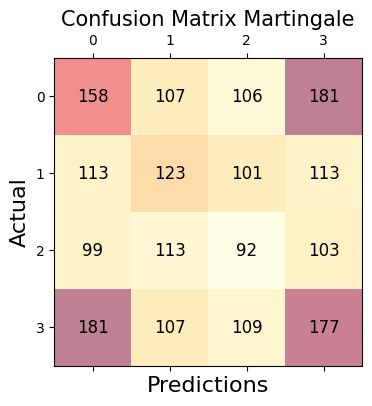

In [24]:
fig, px = plt.subplots(figsize=(4, 4))
px.matshow(confusion_mart, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mart.shape[0]):
    for n in range(confusion_mart.shape[1]):
        px.text(x=m, y=n, s=confusion_mart[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Martingale', fontsize=15)
plt.show()

<AxesSubplot:>

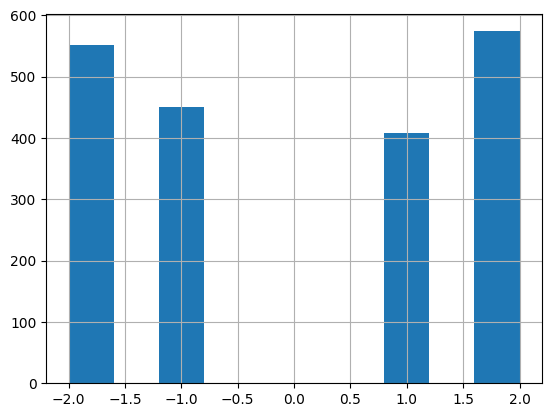

In [25]:
ohlc2['y_hat'].hist()


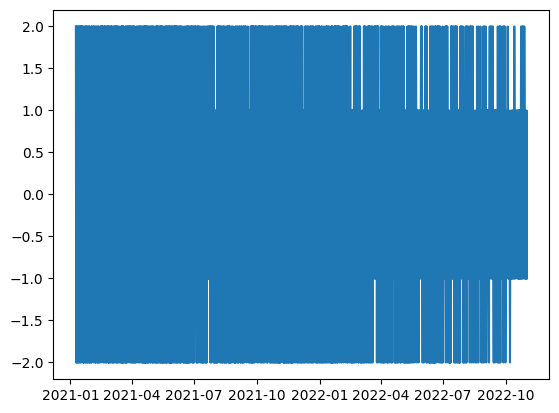

In [26]:
plt.plot(ohlc2['y_hat'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16986371ae0>,
 'caps': [<matplotlib.lines.Line2D at 0x16986372080>,
 'boxes': [<matplotlib.lines.Line2D at 0x16986371810>],
 'medians': [<matplotlib.lines.Line2D at 0x16986372620>],
 'fliers': [<matplotlib.lines.Line2D at 0x169863728f0>],
 'means': []}

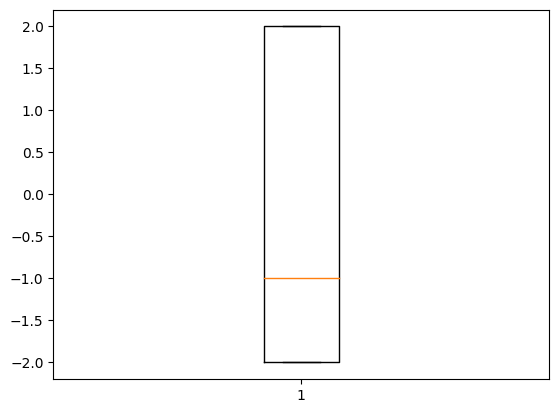

In [27]:
plt.boxplot(ohlc2['y_hat'], notch=None, vert=None, patch_artist=None, widths=None)

In [28]:
corr_y = ohlc2.corrwith(ohlc2['y_hat']).abs()
corr_y

open           0.010010
high           0.008608
low            0.009752
close          0.009570
volume         0.010183
                 ...   
lag_vol_24     0.023131
sum_vol_24     0.006949
mean_vol_24    0.006949
y_hat          1.000000
martingale     0.017353
Length: 236, dtype: float64

In [128]:
X = ohlc2.iloc[:, :-2]
X.head()
y = ohlc2['y_hat'].copy()
y_true = y.copy()
y.head()

timestamp
2021-01-09 00:00:00    2.0
2021-01-09 08:00:00   -2.0
2021-01-09 16:00:00    2.0
2021-01-10 00:00:00   -2.0
2021-01-10 08:00:00   -2.0
Name: y_hat, dtype: float64

In [51]:
genetic_prog = genetic_programed_features(p_data=X, p_target=y, p_params=symbolic_params)

# Process description
sym_process = pd.DataFrame(genetic_prog['sym_data']['details'])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    20.64        0.0152533        3        0.0846927              N/A     11.80s
   1     3.44        0.0425642        3        0.0834276              N/A     37.10s
   2     2.91        0.0484188        1        0.0814518              N/A     30.29s
   3     2.87         0.048419        1        0.0814518              N/A     15.23s
   4     2.81        0.0485068        3        0.0881088              N/A      0.00s


In [64]:
sym_features = genetic_prog['sym_features']
sym_features.iloc[:,:-16]

sym_0    sym_1        sym_2    sym_3
timestamp                                                  
2021-01-09 00:00:00  -538.76  1235.85  -323.408774   707.56
2021-01-09 08:00:00  1358.46  -582.15  1146.440197  2177.07
2021-01-09 16:00:00  -537.71   228.04   851.162735  1866.96
2021-01-10 00:00:00 -1841.11  4089.53  -731.698693   348.35
2021-01-10 08:00:00  1073.93   748.49  -325.084944   656.16
...                      ...      ...          ...      ...
2022-10-30 08:00:00   130.10   -16.08   130.938875   218.13
2022-10-30 16:00:00   611.11    18.57    22.615871   108.53
2022-10-31 00:00:00  -216.85   312.34   186.010357   261.66
2022-10-31 08:00:00  -407.15   536.15    88.806997   161.72
2022-10-31 16:00:00    17.85   131.90   117.451486   200.25

[1983 rows x 4 columns]

In [129]:
X= pd.merge(X,sym_features.iloc[:,:-16],on= 'timestamp')
X

open      high       low     close         volume  \
timestamp                                                                    
2021-01-09 00:00:00  40586.96  40976.13  38720.00  39638.61   26339.845504   
2021-01-09 08:00:00  39639.21  41380.00  39290.86  40525.15   28331.829551   
2021-01-09 16:00:00  40525.16  40880.00  39869.00  40088.22   21114.304620   
2021-01-10 00:00:00  40088.22  41350.00  40050.00  40978.57   20997.296844   
2021-01-10 08:00:00  40978.57  41060.00  38450.00  39671.81   35971.957987   
...                       ...       ...       ...       ...            ...   
2022-10-30 08:00:00  20850.84  20887.34  20589.18  20676.70   76836.129770   
2022-10-30 16:00:00  20676.72  20739.00  20515.00  20627.48   59224.988760   
2022-10-31 00:00:00  20627.48  20675.00  20427.23  20546.65   68309.725380   
2022-10-31 08:00:00  20547.08  20845.92  20237.95  20401.53  148483.503110   
2022-10-31 16:00:00  20402.60  20533.00  20328.68  20490.74   86774.387790   

                     quote_asset_volume     trades  buy_asset_volume  \
timestamp                                                              
2021-01-09 00:00:00        1.049858e+09   689992.0      13179.895302   
2021-01-09 08:00:00        1.151469e+09   734361.0      14306.051097   
2021-01-09 16:00:00        8.534520e+08   573803.0       9521.375510   
2021-01-10 00:00:00        8.550744e+08   582077.0      10977.859896   
2021-01-10 08:00:00        1.432985e+09   829308.0      15653.189864   
...                                 ...        ...               ...   
2022-10-30 08:00:00        1.592142e+09  1948298.0      38104.743320   
2022-10-30 16:00:00        1.221969e+09  1369320.0      29338.226500   
2022-10-31 00:00:00        1.402119e+09  1699697.0      34125.256280   
2022-10-31 08:00:00        3.052348e+09  3053823.0      73524.410160   
2022-10-31 16:00:00        1.771837e+09  1818006.0      43572.630010   

                     taker_buy_asset_volume  volatility_x  ...     sd_ol_24  \
timestamp                                                  ...                
2021-01-09 00:00:00            5.255339e+08       2256.13  ...  1005.532143   
2021-01-09 08:00:00            5.814863e+08       2089.14  ...  1000.559509   
2021-01-09 16:00:00            3.849705e+08       1011.00  ...   998.248947   
2021-01-10 00:00:00            4.472088e+08       1300.00  ...  1012.801456   
2021-01-10 08:00:00            6.233926e+08       2610.00  ...  1030.205993   
...                                     ...           ...  ...          ...   
2022-10-30 08:00:00            7.896142e+08        298.16  ...   100.838762   
2022-10-30 16:00:00            6.053755e+08        224.00  ...   100.702445   
2022-10-31 00:00:00            7.004657e+08        247.77  ...    99.925581   
2022-10-31 08:00:00            1.511555e+09        607.97  ...   104.753857   
2022-10-31 16:00:00            8.897572e+08        204.32  ...   102.387850   

                       sd_ho_24    sd_hl_24    lag_vol_24    sum_vol_24  \
timestamp                                                                 
2021-01-09 00:00:00  877.979068  979.369907  18869.366827  9.693096e+05   
2021-01-09 08:00:00  874.630363  919.990854  20078.654834  9.775628e+05   
2021-01-09 16:00:00  865.965672  899.950559  15234.903350  9.834422e+05   
2021-01-10 00:00:00  852.161796  872.297573  17258.671371  9.871808e+05   
2021-01-10 08:00:00  865.928795  872.911203  43255.778007  9.798970e+05   
...                         ...         ...           ...           ...   
2022-10-30 08:00:00  210.453942  177.298878  44152.040190  2.168472e+06   
2022-10-30 16:00:00  208.706243  172.417482  34247.689950  2.193450e+06   
2022-10-31 00:00:00  207.561870  163.659672  31554.353690  2.230205e+06   
2022-10-31 08:00:00  205.193743  164.522277  37595.390430  2.341093e+06   
2022-10-31 16:00:00  197.099201  165.066518  97907.457720  2.329960e+06   

                      mean_vol_24    sym_0    sym_1        sym_2    s

In [130]:
# Normalizer and scaler
scale = MinMaxScaler().fit(X)
X_scale = scale.transform(X)
X_scale = pd.DataFrame(X_scale, index=X.index, columns=X.columns)
X_scale.head()
transformer = Normalizer(norm='max').fit(X_scale)
transformed = transformer.transform(X_scale)
X_normalized = pd.DataFrame(transformed, index=X.index, columns=X.columns)
X_normalized.head()
x = X_normalized.copy()
x.head()

open      high       low     close    volume  \
timestamp                                                               
2021-01-09 00:00:00  0.785913  0.785967  0.764689  0.767558  0.150564   
2021-01-09 08:00:00  0.733880  0.758886  0.741914  0.750291  0.154844   
2021-01-09 16:00:00  0.754505  0.753935  0.757067  0.746379  0.116047   
2021-01-10 00:00:00  0.717466  0.733071  0.731053  0.733409  0.110935   
2021-01-10 08:00:00  0.744167  0.738615  0.712150  0.720445  0.192840   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2021-01-09 00:00:00            0.225497  0.233308          0.150964   
2021-01-09 08:00:00            0.236469  0.237415          0.156673   
2021-01-09 16:00:00            0.176254  0.186551          0.104860   
2021-01-10 00:00:00            0.169750  0.181913          0.116219   
2021-01-10 08:00:00            0.288654  0.262983          0.168148   

                     taker_buy_asset_volume  volatility_x  ...  sd_ol_24  \
timestamp                                                  ...             
2021-01-09 00:00:00                0.238633      0.251794  ...  0.522363   
2021-01-09 08:00:00                0.252454      0.222927  ...  0.496703   
2021-01-09 16:00:00                0.168076      0.108488  ...  0.498218   
2021-01-10 00:00:00                0.187688      0.134098  ...  0.486674   
2021-01-10 08:00:00                0.265471      0.273180  ...  0.503222   

                     sd_ho_24  sd_hl_24  lag_vol_24  sum_vol_24  mean_vol_24  \
timestamp                                                                      
2021-01-09 00:00:00  0.878949  0.527498    0.107861    0.325830     0.325830   
2021-01-09 08:00:00  0.836819  0.469584    0.109738    0.315004     0.315004   
2021-01-09 16:00:00  0.832259  0.460427    0.083733    0.319263     0.319263   
2021-01-10 00:00:00  0.785836  0.426945    0.091183    0.308419     0.308419   
2021-01-10 08:00:00  0.811735  0.433564    0.231888    0.309942     0.309942   

                        sym_0     sym_1     sym_2     sym_3  
timestamp                                                    
2021-01-09 00:00:00  0.602770  0.736972  0.386905  0.080723  
2021-01-09 08:00:00  0.693285  0.595435  0.538663  0.237477  
2021-01-09 16:00:00  0.579629  0.647724  0.507606  0.204796  
2021-01-10 00:00:00  0.479504  0.846855  0.312294  0.036732  
2021-01-10 08:00:00  0.662819  0.662443  0.362663  0.070206  

[5 rows x 238 columns]

                 open      high       low     close    volume  \
open         1.000000  0.998592  0.997190  0.996658 -0.686369   
high         0.998592  1.000000  0.996853  0.998276 -0.685992   
low          0.997190  0.996853  1.000000  0.998318 -0.703812   
close        0.996658  0.998276  0.998318  1.000000 -0.698271   
volume      -0.686369 -0.685992 -0.703812 -0.698271  1.000000   
...               ...       ...       ...       ...       ...   
mean_vol_24 -0.822363 -0.827948 -0.824150 -0.828866  0.810502   
sym_0        0.070193  0.061613  0.067507  0.059189  0.093631   
sym_1        0.122013  0.111958  0.120418  0.109705  0.014868   
sym_2        0.067883  0.064883  0.070688  0.065929  0.063759   
sym_3        0.165373  0.173956  0.151957  0.165020 -0.071997   

             quote_asset_volume    trades  buy_asset_volume  \
open                  -0.395097 -0.620252         -0.694528   
high                  -0.386496 -0.621218         -0.693306   
low                   -0.42973

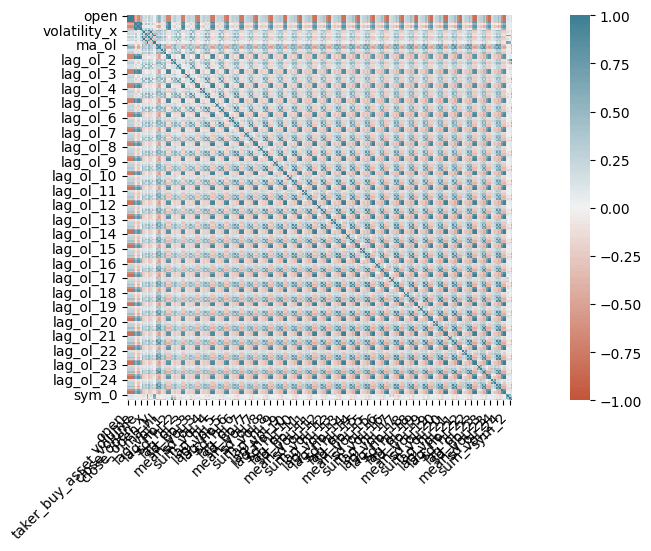

In [131]:
# %% Heatmaps
# Heat map
correlation = x.corr()
print(correlation)

heat = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

             open  high  low  close   volume  quote_asset_volume    trades  \
open          1.0   0.6 -0.6   -1.0      NaN                 NaN       NaN   
high          0.6   1.0 -1.0   -0.6      NaN                 NaN       NaN   
low          -0.6  -1.0  1.0    0.6      NaN                 NaN       NaN   
close        -1.0  -0.6  0.6    1.0      NaN                 NaN       NaN   
volume        NaN   NaN  NaN    NaN  1.00000           -0.612903  0.960956   
...           ...   ...  ...    ...      ...                 ...       ...   
mean_vol_24   NaN   NaN  NaN    NaN -0.84236           -1.000000 -0.994680   
sym_0         NaN   NaN  NaN    NaN      NaN                 NaN       NaN   
sym_1         NaN   NaN  NaN    NaN      NaN                 NaN       NaN   
sym_2         NaN   NaN  NaN    NaN      NaN                 NaN       NaN   
sym_3         NaN   NaN  NaN    NaN      NaN                 NaN       NaN   

             buy_asset_volume  taker_buy_asset_volume  volatili

<AxesSubplot:>

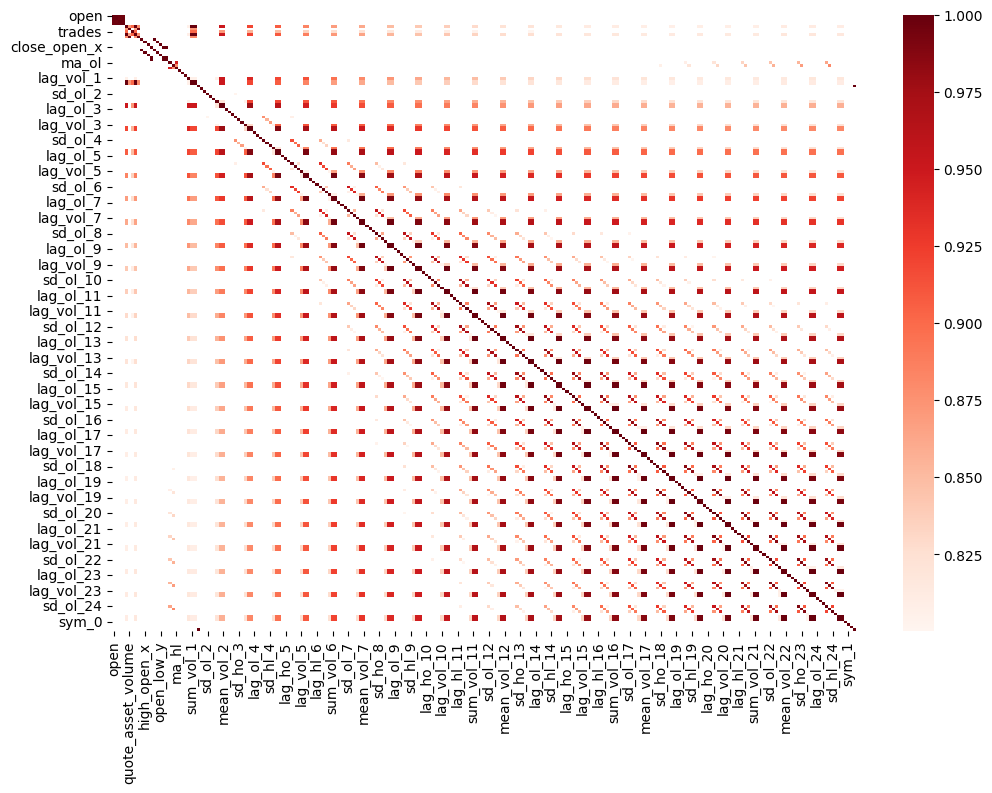

In [132]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='spearman')
print(corr2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")

                 open      high       low     close    volume  \
open         1.000000  0.470979 -0.686471 -0.911378       NaN   
high         0.470979  1.000000 -0.934224 -0.112834       NaN   
low         -0.686471 -0.934224  1.000000  0.332487       NaN   
close       -0.911378 -0.112834  0.332487  1.000000       NaN   
volume            NaN       NaN       NaN       NaN  1.000000   
...               ...       ...       ...       ...       ...   
mean_vol_24       NaN       NaN       NaN       NaN -0.900906   
sym_0             NaN       NaN       NaN       NaN       NaN   
sym_1             NaN       NaN       NaN       NaN       NaN   
sym_2             NaN       NaN       NaN       NaN       NaN   
sym_3             NaN       NaN       NaN       NaN       NaN   

             quote_asset_volume    trades  buy_asset_volume  \
open                        NaN       NaN               NaN   
high                        NaN       NaN               NaN   
low                         Na

<AxesSubplot:>

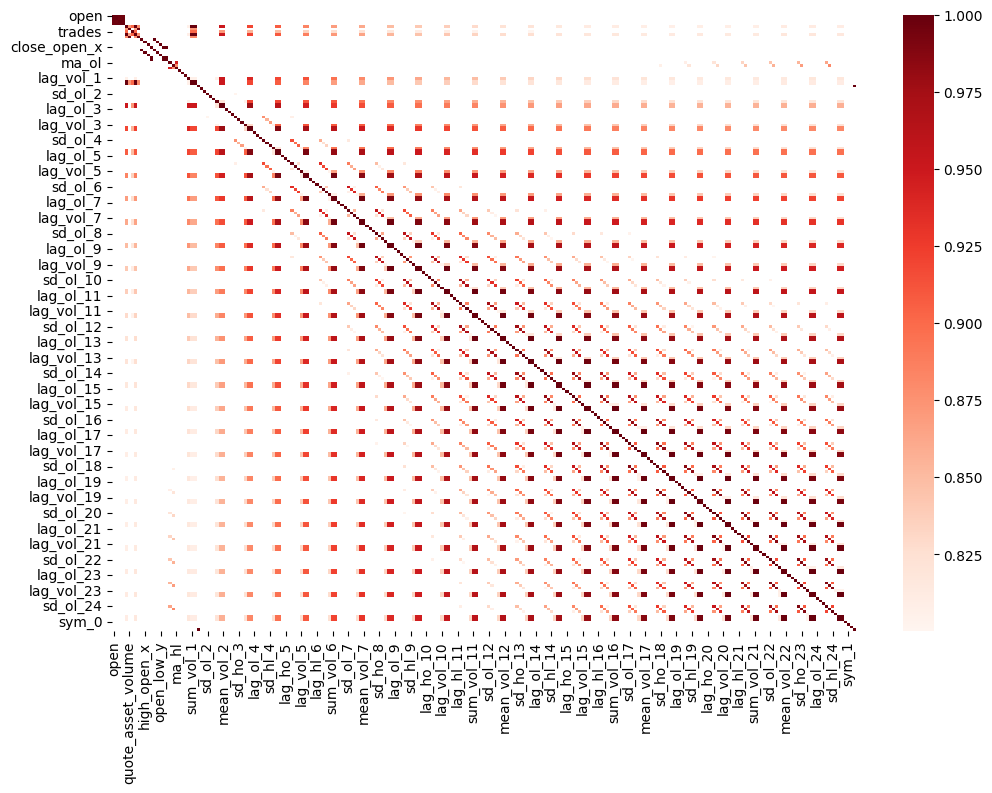

In [133]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='pearson')
print(corr2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")


In [134]:
cor_matrix = x.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
print(upper_tri)

                 open      high       low     close    volume  \
open         1.000000  0.998592  0.997190  0.996658  0.686369   
high         0.998592  1.000000  0.996853  0.998276  0.685992   
low          0.997190  0.996853  1.000000  0.998318  0.703812   
close        0.996658  0.998276  0.998318  1.000000  0.698271   
volume       0.686369  0.685992  0.703812  0.698271  1.000000   
...               ...       ...       ...       ...       ...   
mean_vol_24  0.822363  0.827948  0.824150  0.828866  0.810502   
sym_0        0.070193  0.061613  0.067507  0.059189  0.093631   
sym_1        0.122013  0.111958  0.120418  0.109705  0.014868   
sym_2        0.067883  0.064883  0.070688  0.065929  0.063759   
sym_3        0.165373  0.173956  0.151957  0.165020  0.071997   

             quote_asset_volume    trades  buy_asset_volume  \
open                   0.395097  0.620252          0.694528   
high                   0.386496  0.621218          0.693306   
low                    0.42973

C:\Users\Emilio\AppData\Local\Temp\ipykernel_21880\3274853634.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [135]:
# .5 according to JF, but not many features after that.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= .80)]
print();
print(to_drop)


['high', 'low', 'close', 'quote_asset_volume', 'trades', 'buy_asset_volume', 'taker_buy_asset_volume', 'volatility_y', 'high_open_y', 'open_low_y', 'close_open_y', 'co', 'ma_hl', 'lag_vol_1', 'sum_vol_1', 'mean_vol_1', 'lag_vol_2', 'sum_vol_2', 'mean_vol_2', 'sd_ol_3', 'lag_vol_3', 'sum_vol_3', 'mean_vol_3', 'sd_ol_4', 'sd_ho_4', 'sd_hl_4', 'lag_vol_4', 'sum_vol_4', 'mean_vol_4', 'sd_ol_5', 'sd_ho_5', 'sd_hl_5', 'lag_vol_5', 'sum_vol_5', 'mean_vol_5', 'sd_ol_6', 'sd_ho_6', 'sd_hl_6', 'lag_vol_6', 'sum_vol_6', 'mean_vol_6', 'sd_ol_7', 'sd_ho_7', 'sd_hl_7', 'lag_vol_7', 'sum_vol_7', 'mean_vol_7', 'sd_ol_8', 'sd_ho_8', 'sd_hl_8', 'lag_vol_8', 'sum_vol_8', 'mean_vol_8', 'sd_ol_9', 'sd_ho_9', 'sd_hl_9', 'lag_vol_9', 'sum_vol_9', 'mean_vol_9', 'sd_ol_10', 'sd_ho_10', 'sd_hl_10', 'lag_vol_10', 'sum_vol_10', 'mean_vol_10', 'sd_ol_11', 'sd_ho_11', 'sd_hl_11', 'lag_vol_11', 'sum_vol_11', 'mean_vol_11', 'sd_ol_12', 'sd_ho_12', 'sd_hl_12', 'lag_vol_12', 'sum_vol_12', 'mean_vol_12', 'sd_ol_13', 's

In [136]:
x = x.drop(x[to_drop], axis=1)
print();
print(x.head())
x.head()


                         open    volume  volatility_x  high_open_x  \
timestamp                                                            
2021-01-09 00:00:00  0.785913  0.150564      0.251794     0.082206   
2021-01-09 08:00:00  0.733880  0.154844      0.222927     0.351579   
2021-01-09 16:00:00  0.754505  0.116047      0.108488     0.072069   
2021-01-10 00:00:00  0.717466  0.110935      0.134098     0.246346   
2021-01-10 08:00:00  0.744167  0.192840      0.273180     0.016131   

                     open_low_x  close_open_x     ma_ol  ma_ho  lag_ol_1  \
timestamp                                                                  
2021-01-09 00:00:00    0.212996      0.638075  0.564535    1.0  0.248376   
2021-01-09 08:00:00    0.037998      0.816927  0.542193    1.0  0.203650   
2021-01-09 16:00:00    0.071977      0.671505  0.554508    1.0  0.038212   
2021-01-10 00:00:00    0.004030      0.790191  0.522283    1.0  0.069190   
2021-01-10 08:00:00    0.270544      0.558763  0.574

open    volume  volatility_x  high_open_x  \
timestamp                                                            
2021-01-09 00:00:00  0.785913  0.150564      0.251794     0.082206   
2021-01-09 08:00:00  0.733880  0.154844      0.222927     0.351579   
2021-01-09 16:00:00  0.754505  0.116047      0.108488     0.072069   
2021-01-10 00:00:00  0.717466  0.110935      0.134098     0.246346   
2021-01-10 08:00:00  0.744167  0.192840      0.273180     0.016131   

                     open_low_x  close_open_x     ma_ol  ma_ho  lag_ol_1  \
timestamp                                                                  
2021-01-09 00:00:00    0.212996      0.638075  0.564535    1.0  0.248376   
2021-01-09 08:00:00    0.037998      0.816927  0.542193    1.0  0.203650   
2021-01-09 16:00:00    0.071977      0.671505  0.554508    1.0  0.038212   
2021-01-10 00:00:00    0.004030      0.790191  0.522283    1.0  0.069190   
2021-01-10 08:00:00    0.270544      0.558763  0.574416    1.0  0.004089   

                     lag_ho_1  ...  lag_hl_22  lag_ol_23  lag_ho_23  \
timestamp                      ...                                    
2021-01-09 00:00:00  0.162847  ...   0.082077   0.025168   0.107130   
2021-01-09 08:00:00  0.078599  ...   0.093259   0.061533   0.034603   
2021-01-09 16:00:00  0.353558  ...   0.249608   0.042251   0.099276   
2021-01-10 00:00:00  0.069278  ...   0.309457   0.029268   0.399948   
2021-01-10 08:00:00  0.249962  ...   0.294649   0.148839   0.318729   

                     lag_hl_23  lag_ol_24  lag_ho_24  lag_hl_24     sym_0  \
timestamp                                                                   
2021-01-09 00:00:00   0.081221   0.026635   0.115412   0.087033  0.602770   
2021-01-09 08:00:00   0.078476   0.024063   0.102429   0.077657  0.693285   
2021-01-09 16:00:00   0.093784   0.061879   0.034797   0.078917  0.579629   
2021-01-10 00:00:00   0.239941   0.040615   0.095432   0.090152  0.479504   
2021-01-10 08:00:00   0.313999   0.029697   0.405819   0.243464  0.662819   

                        sym_1     sym_2  
timestamp                                
2021-01-09 00:00:00  0.736972  0.386905  
2021-01-09 08:00:00  0.595435  0.538663  
2021-01-09 16:00:00  0.647724  0.507606  
2021-01-10 00:00:00  0.846855  0.312294  
2021-01-10 08:00:00  0.662443  0.362663  

[5 rows x 88 columns]

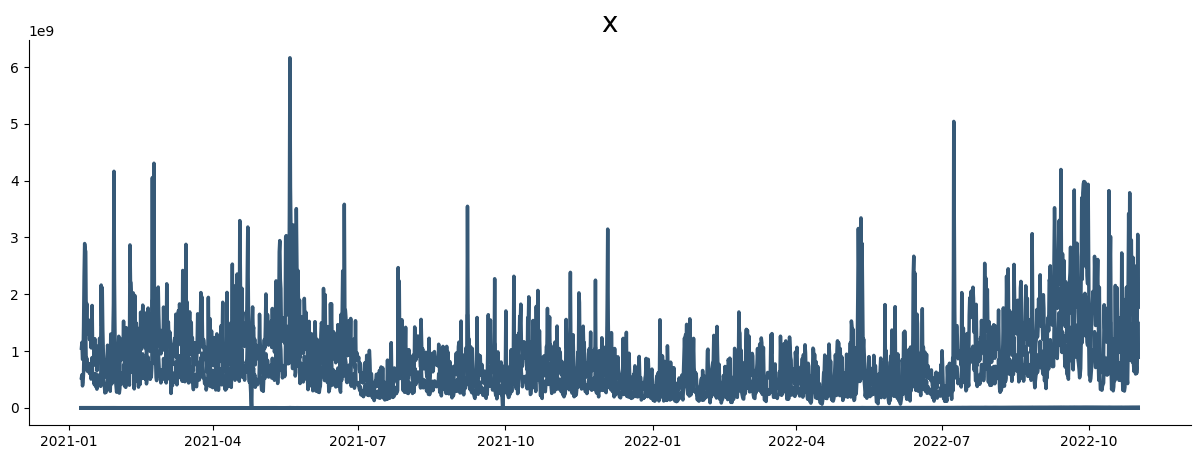

In [137]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.title('x', size=20)
plt.plot(X);

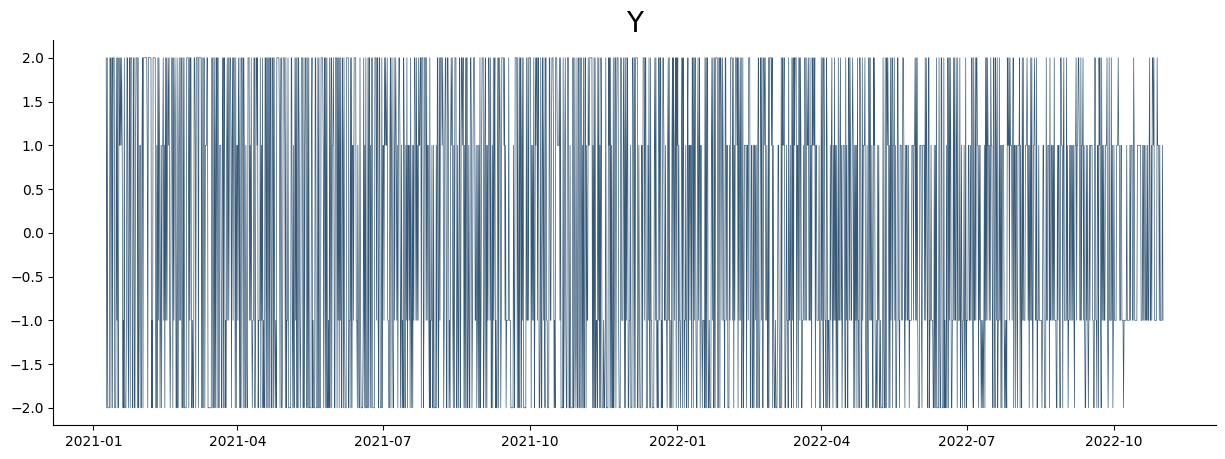

In [138]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = .5
plt.title('Y', size=20)
plt.plot(y);

In [139]:
test_size = int(len(x) * .30)
trial_size = int(len(x) * .10)
X_train = x[:-test_size].copy()
X_test = x[-test_size:].copy()
X_test = X_test[:-trial_size].copy()
X_trial = X_test[-trial_size:].copy()

X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_trial2 = X_trial.copy()

X_train3 = X_train.copy()
X_test3 = X_test.copy()
X_trial3 = X_trial.copy()

X_train4 = X_train.copy()
X_test4 = X_test.copy()
X_trial4 = X_trial.copy()

X_train5 = X_train.copy()
X_test5 = X_test.copy()
X_trial5 = X_trial.copy()

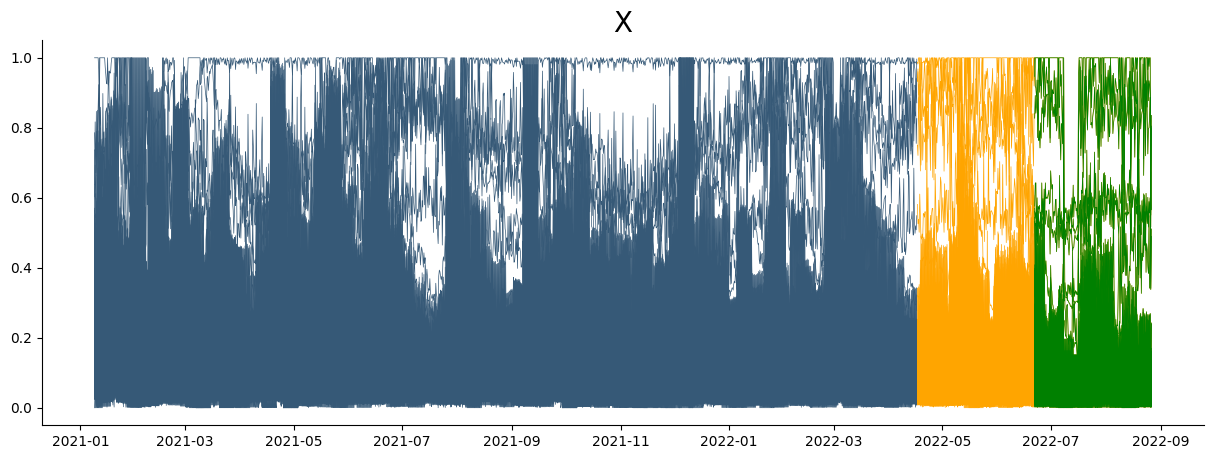

In [140]:
plt.title('X', size=20)
plt.plot(X_train)  # ,label='Training set')
plt.plot(X_test, label='Test set', color='orange')
plt.plot(X_trial,label= 'Trial set',color='green')
plt.legend;


In [141]:
y_train = y[:-test_size].copy()
y_test = y[-test_size:].copy()
y_test = y_test[:-trial_size].copy()
y_trial = y_test[-trial_size:].copy()

y_train2 = y_train.copy()
y_test2 = y_test.copy()
y_trial2 = y_trial.copy()

y_train3 = y_train.copy()
y_test3 = y_test.copy()
y_trial3 = y_trial.copy()

y_train4 = y_train.copy()
y_test4 = y_test.copy()
y_trial4 = y_trial.copy()

y_train5 = y_train.copy()
y_test5 = y_test.copy()
y_trial5 = y_trial.copy()

Y_train_dum = pd.get_dummies(y_train5, prefix='y')
Y_test_dum = pd.get_dummies(y_test5, prefix='y')
Y_trial_dum = pd.get_dummies(y_trial5,prefix='y')

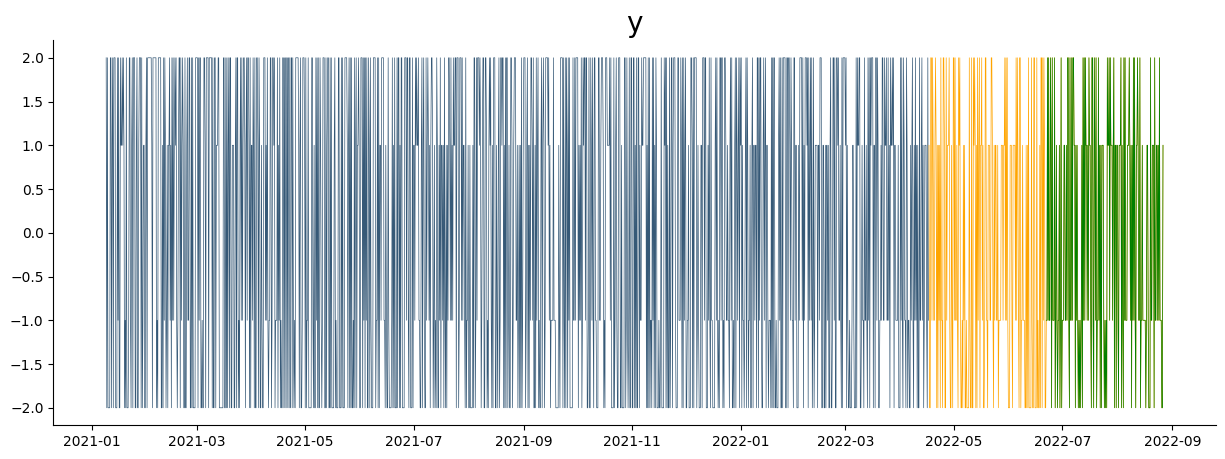

In [142]:
plt.title('y', size=20)
plt.plot(y_train, label='Training set')
plt.plot(y_test, label='Test set', color='orange')
plt.plot(y_trial,label='Trial set',color='green')
plt.legend;


In [143]:
#naive bayes
# %% Naive Bayes
print(X_train.shape, X_test.shape)
# instantiate the model
gnb = GaussianNB()
# gnb = CategoricalNB()
# pgmpy()

# fit the model
gnb.fit(X_train2, y_train2)

(1389, 88) (396, 88)


GaussianNB()

In [144]:
y_train

timestamp
2021-01-09 00:00:00    2.0
2021-01-09 08:00:00   -2.0
2021-01-09 16:00:00    2.0
2021-01-10 00:00:00   -2.0
2021-01-10 08:00:00   -2.0
                      ... 
2022-04-15 08:00:00    1.0
2022-04-15 16:00:00   -1.0
2022-04-16 00:00:00   -2.0
2022-04-16 08:00:00    2.0
2022-04-16 16:00:00   -1.0
Name: y_hat, Length: 1389, dtype: float64

In [145]:
y_pred2 = gnb.predict(X_test2)

In [146]:
accuracy_naive = (accuracy_score(y_test2, y_pred2)) * 100
recall_naive = recall_score(y_test2, y_pred2, average='weighted') * 100
precision_naive = precision_score(y_test2, y_pred2, average='weighted', zero_division=0) * 100
f1_naive = f1_score(y_test2, y_pred2, average='weighted') * 100
balanced_naive = balanced_accuracy_score(y_test2, y_pred2) * 100
print('Accuracy:', accuracy_naive, '%')
print('Recall:', recall_naive, '%')
print('Precision:', precision_naive, '%')
print('F1:', f1_naive, '%')
print('Balanced Accuracy:', balanced_naive, '%')

Accuracy: 31.565656565656564 %
Recall: 31.565656565656564 %
Precision: 30.331703736876147 %
F1: 27.074558699797922 %
Balanced Accuracy: 28.91193616008529 %


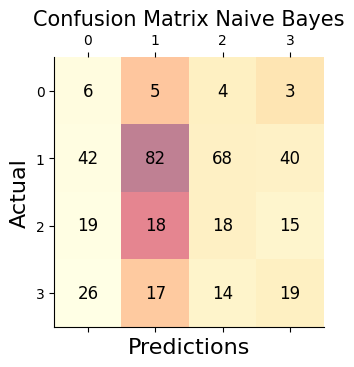

In [147]:
y_pred_train = gnb.predict(X_train2)
conf_mat = confusion_matrix(y_test2, y_pred2)
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(conf_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(conf_mat.shape[0]):
    for n in range(conf_mat.shape[1]):
        px.text(x=m, y=n, s=conf_mat[m, n], va='center', ha='center', size='large')
# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Naive Bayes', fontsize=15)
plt.show()

In [148]:
y_pred2_trial = gnb.predict(X_trial2)

In [149]:
accuracy_naive2 = (accuracy_score(y_trial2, y_pred2_trial)) * 100
recall_naive2 = recall_score(y_trial2, y_pred2_trial, average='weighted') * 100
precision_naive2 = precision_score(y_trial2, y_pred2_trial, average='weighted', zero_division=0) * 100
f1_naive2 = f1_score(y_trial2, y_pred2_trial, average='weighted') * 100
balanced_naive2 = balanced_accuracy_score(y_trial2, y_pred2_trial) * 100
print('Accuracy:', accuracy_naive2, '%')
print('Recall:', recall_naive2, '%')
print('Precision:', precision_naive2, '%')
print('F1:', f1_naive2, '%')
print('Balanced Accuracy:', balanced_naive2, '%')

Accuracy: 34.34343434343434 %
Recall: 34.34343434343434 %
Precision: 26.598975116632 %
F1: 28.680592354505404 %
Balanced Accuracy: 26.632420091324207 %


In [150]:
# Logistic regression simple
logistic_model_simple = LogisticRegression(max_iter=1000000)
logistic_model_simple.fit(X_train,y_train)

LogisticRegression(max_iter=1000000)

In [151]:
# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model_simple.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)
print(accuracy)


27.02020202020202


In [152]:
logistic_model_simple.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [153]:
# si fueron 0 se quitaron por efecto de la regularizacion L1 y son:
# si
coef = logistic_model_simple.coef_
print(logistic_model_simple.intercept_)
print(coef)

[-0.05111406 -0.07704213 -0.14832641  0.2764826 ]
[[ 4.21733564e-01  2.40623436e-01 -2.21046026e-02 -2.75108174e-01
   1.25989027e-01  5.13711088e-03  3.17979656e-01  1.49982448e-01
  -1.11527433e-01  4.22699137e-01  1.14230486e-01 -4.08244224e-01
  -1.56028399e-01 -4.81797598e-01  8.25679175e-03 -2.65717212e-01
  -9.01292101e-02  6.89120034e-02 -1.46282450e-01 -9.87516591e-03
   3.01055569e-01  3.34855222e-01  1.01319802e-01 -9.56084890e-02
   4.86007763e-02  6.54644200e-02  3.85554891e-01  2.67745974e-01
   3.24200170e-02 -1.92469685e-01 -6.99758825e-02  2.27904452e-01
  -2.77670247e-01  7.62394618e-02  1.47589836e-01  4.90989625e-01
   4.03790259e-01  4.26413681e-01 -2.39947432e-01  2.90359756e-01
   6.11361277e-01 -3.76854467e-01  3.98948679e-01  9.25400071e-02
   3.29836703e-02  1.07953081e-01  3.66771022e-01 -1.76138025e-01
   2.65728327e-01  5.64721241e-02 -3.78283524e-01 -1.44621004e-01
   1.32320904e-01 -1.07048974e-01  7.28827621e-02 -1.52304497e-01
  -2.92512225e-01 -3.03537

In [154]:
predict_ = logistic_model_simple.predict_proba(X_train)
print(predict_)

[[0.41401611 0.06104715 0.09886676 0.42606998]
 [0.29693332 0.12462935 0.07933366 0.49910367]
 [0.41231352 0.06706896 0.09258594 0.42803158]
 ...
 [0.26155635 0.24609115 0.23658913 0.25576336]
 [0.17095986 0.28332889 0.30002741 0.24568384]
 [0.22858133 0.26135972 0.30069458 0.20936436]]


(1.0, 30000.0, -3.0, 3.0)

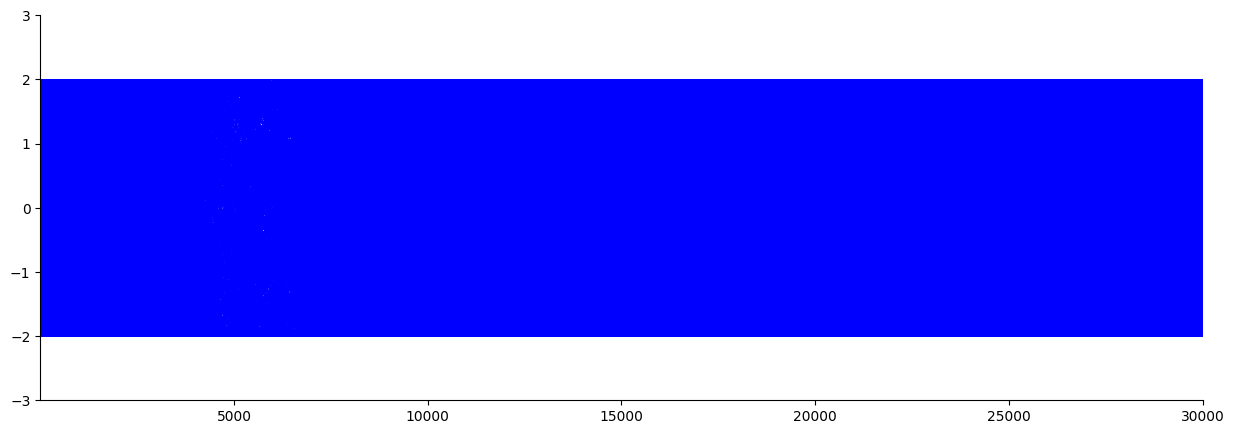

In [155]:
plt.plot(X_test, y_pred, 'r')
plt.plot(X, y_true, 'b')
plt.axis([1, 30000, -3, 3])


In [156]:
y_pred_simple = logistic_model_simple.predict(X_test)
accuracy_logistic_simple = accuracy_score(y_test, y_pred) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)
recall_logistic_simple = recall_score(y_test, y_pred, average='weighted') * 100
precision_logistic_simple = precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100
f1_logistic_simple = f1_score(y_test, y_pred, average='weighted') * 100
balanced_logistic_simple = balanced_accuracy_score(y_test, y_pred) * 100

print('Accuracy:', accuracy_logistic_simple, '%')
print('Recall:', recall_logistic_simple, '%')
print('Precision:', precision_logistic_simple, '%')
print('F1:', f1_logistic_simple, '%')
print('Balanced Accuracy:', balanced_logistic_simple, '%')
print("Confusion Matrix:")

print(confusion_mat)


Accuracy: 27.02020202020202 %
Recall: 27.02020202020202 %
Precision: 29.541434326194636 %
F1: 25.443490772955517 %
Balanced Accuracy: 28.249921900768015 %
Confusion Matrix:
[[ 7 19 16 51]
 [ 8 27 26 61]
 [ 7 24 34 39]
 [ 4 13 21 39]]


In [157]:
y_pred_simple2 = logistic_model_simple.predict(X_trial)
accuracy = accuracy_score(y_trial, y_pred_simple2) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_trial, y_pred_simple2)
print(accuracy)

24.747474747474747


In [ ]:
# Regression with Elastic Net and hiper parameters optimization


In [158]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [159]:
pipelineLR = make_pipeline(
LogisticRegression(random_state=False, penalty='elasticnet',solver ='saga', max_iter=1000000, C=1
 ))
param_grid_lr = [{
    'logisticregression__l1_ratio':[.50,.60,.70,.80,.90],
    'logisticregression__class_weight':[None,'balanced'],
    'logisticregression__C':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    'logisticregression__solver':['saga']
}]
gd_lm = GridSearchCV(estimator=pipelineLR,
                     param_grid=param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
gd_lm.fit(X_train3, y_train3)
print(gd_lm.best_score_)

C:\Users\Emilio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


700 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
700 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Emilio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Emilio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Emilio\AppData\Local\Programs\Python\Python3

0.3722135335210093


In [160]:
gd_lm.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__class_weight': None,
 'logisticregression__l1_ratio': 0.5,
 'logisticregression__solver': 'saga'}

In [161]:
clfLR = gd_lm.best_estimator_
clfLR

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=1000000,
                                    penalty='elasticnet', random_state=False,
                                    solver='saga'))])

In [167]:
clfLR.score(X_test3, y_test3)

0.20454545454545456

In [172]:
logistic_model = LogisticRegression(random_state=False, penalty='elasticnet',
                                            solver='saga', l1_ratio=0.5, max_iter=1000000, C=0.1,
                                            class_weight= None, )
logistic_model.fit(X_train3, y_train3)

LogisticRegression(C=0.1, l1_ratio=0.5, max_iter=1000000, penalty='elasticnet',
                   random_state=False, solver='saga')

In [179]:
y_pred3 = logistic_model.predict(X_test3)
accuracy = accuracy_score(y_test3, y_pred3) * 100
logistic_model.score(x, y)
confusion_mat = confusion_matrix(y_test3, y_pred3)

y_pred_trial = logistic_model.predict(X_trial3)
accuracy_trial = accuracy_score(y_trial3, y_pred_trial) * 100
logistic_model.score(x, y)
print(accuracy)
print(accuracy_trial)

20.454545454545457
20.2020202020202


In [180]:
pickle.dump(clfLR, open('logg2.pkl', 'wb'))

In [184]:
accuracy_logistic= accuracy_score(y_test3, y_pred3) * 100

recall_logistic = recall_score(y_test3, y_pred3, average='weighted') * 100
precision_logistic = precision_score(y_test3, y_pred3, average='weighted', zero_division=0) * 100
f1_logistic = f1_score(y_test3, y_pred3, average='weighted') * 100
balanced_logistic = balanced_accuracy_score(y_test3, y_pred3) * 100

print('Accuracy:', accuracy_logistic, '%')
print('Recall:', recall_logistic, '%')
print('Precision:', precision_logistic, '%')
print('F1:', f1_logistic, '%')
print('Balanced Accuracy:', balanced_logistic, '%')
print("Confusion Matrix:")

print(confusion_mat)


Accuracy: 20.454545454545457 %
Recall: 20.454545454545457 %
Precision: 9.888858418270182 %
F1: 9.920317544950976 %
Balanced Accuracy: 25.7401200949588 %
Confusion Matrix:
[[ 10   0   0  83]
 [ 13   0   0 109]
 [ 10   0   0  94]
 [  6   0   0  71]]


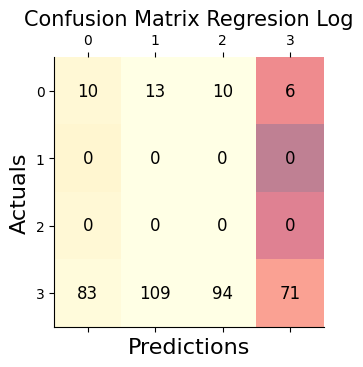

In [185]:
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(confusion_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mat.shape[0]):
    for n in range(confusion_mat.shape[1]):
        px.text(x=m, y=n, s=confusion_mat[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix Regresion Log', fontsize=15)
plt.show()

# Random Forest

In [186]:
seed = 4

In [187]:
pipelineRFC = make_pipeline(
RandomForestClassifier(max_depth=None,min_samples_split=2,n_estimators=500))

param_grid_rfc = [{
    'randomforestclassifier__max_features':['sqrt', 'log2', None],
    'randomforestclassifier__criterion':['gini','entropy','log_loss'],
    #'ranfomforestclassifier__n_estimators':[100, 500,1000]    
}]

gsrfc =GridSearchCV(estimator= pipelineRFC,
                   param_grid=param_grid_rfc,
                   scoring='accuracy',
                   cv=10,
                   n_jobs=1)
gs_rfc =gsrfc.fit(X_train4,y_train4)
print(gs_rfc.best_score_)

0.3556771973725367


In [ ]:
print(gs_rfc.best_params_)


In [188]:
clfRFC = gs_rfc.best_estimator_
clfRFC

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_features='log2',
                                        n_estimators=500))])

In [189]:
clfRFC.score(X_test4, y_test4)

0.26262626262626265

In [190]:
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=None,
                             max_features='sqrt', min_samples_split=2,
                             oob_score=True,n_jobs=4, criterion= 'gini')

# Train the model using the training sets
clf.fit(X_train4, y_train4)


RandomForestClassifier(n_estimators=1000, n_jobs=4, oob_score=True)

In [191]:
pickle.dump(clfRFC, open('forest2.pkl', 'wb'))

In [192]:
# performing predictions on the test dataset
y_pred4 = clf.predict(X_test4)
accuracy_forest = accuracy_score(y_test4, y_pred4) * 100
print(clf.score(X_test4, y_test4))

0.2601010101010101


In [193]:
# performing predictions on the trial dataset
y_pred4_trial = clf.predict(X_trial4)
accuracy_forest_trial = accuracy_score(y_trial4, y_pred4_trial) * 100
print(clf.score(X_trial4, y_trial4))

0.24242424242424243


In [194]:
confusion_mat = confusion_matrix(y_test4, y_pred4)

In [195]:
recall_forest = recall_score(y_test4, y_pred4, average='weighted') * 100
precision_forest = precision_score(y_test4, y_pred4, average='weighted', zero_division=0) * 100
f1_forest = f1_score(y_test4, y_pred4, average='weighted') * 100
balanced_forest = balanced_accuracy_score(y_test4, y_pred4) * 100

print('Accuracy:', accuracy_forest, '%')
print('Recall:', recall_forest, '%')
print('Precision:', precision_forest, '%')
print('F1:', f1_forest, '%')
print('Balanced Accuracy:', balanced_forest, '%')
print("Confusion Matrix:")

print(confusion_mat)

Accuracy: 26.01010101010101 %
Recall: 26.01010101010101 %
Precision: 32.62647378785268 %
F1: 23.502318463031227 %
Balanced Accuracy: 29.029181311373275 %
Confusion Matrix:
[[13  6  9 65]
 [13 16 23 70]
 [10 11 21 62]
 [10  5  9 53]]


## Multilayer perceptron for Classification

In [196]:
n_inputs = len(list(X_train5.columns))
neuron_quant = [n_inputs, n_inputs+2,n_inputs+4,n_inputs+8,n_inputs+16,n_inputs+32,n_inputs+64]
quant_hidden = [1,2]
learning_rate = [0.01,0.1,0.5,1]
batch_size = [1,8,16]
import tensorflow as tf
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from  sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping

In [197]:

import tensorflow_addons as tfa


In [198]:
recc = []
fitness=0
model_best =[]
for i in neuron_quant:
    for j in quant_hidden:
        for k in batch_size:
                
               

                # Agregar: learning rate, momentum, nesterov, dropout, modificar capas, neuronas por capa, funcion activacion
                # por capa.
                n_inputs = len(list(X_train5.columns))
                # Neural network structure
                model = Sequential()
                
                model.add(Dense(n_inputs, activation='sigmoid', input_shape=(n_inputs,)))
                # model.add(Dense(10, activation='softplus'))
                model.add(Dense(i, activation='sigmoid'))
                model.add(Dense(4, activation='softmax'))
                # Optimizer configuration
                # model.compile(loss='binary_crossentropy',
                # with no one hot encoding
                #model.compile(loss='sparse_categorical_crossentropy',
                #              optimizer='Adam',
                #              metrics=['accuracy'])
                # with one hot encoding
                model.compile(loss='categorical_crossentropy',
                              optimizer='Adam',
                              metrics=['accuracy'])
                model_history = model.fit(X_train5, Y_train_dum, epochs=50, batch_size=k, verbose=1,
                                         validation_data=(X_test5,Y_test_dum))
                score = model.evaluate(X_test5, Y_test_dum,verbose=1)
                Y_prob = model.predict(X_test5)
                R2_score_val = r2_score(Y_test_dum, Y_prob)
                metric = tfa.metrics.F1Score(num_classes=4, threshold=0.5)
                metric.update_state(Y_test_dum, Y_prob)
                result = metric.result()
                result_mean= np.mean(result)

                result.numpy()
                if result_mean > fitness:
                    model_best = model
                fitness = result_mean
                
                #model.evalu model.evaluate(x_test, y_test, batch_size=128) 
                recc.append(model_history)
model.save_weights(route+'weights')

Epoch 1/50
1389/1389 [==============================] - 4s 2ms/step - loss: 1.3679 - accuracy: 0.3355 - val_loss: 1.4117 - val_accuracy: 0.3106
Epoch 2/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3459 - accuracy: 0.3513 - val_loss: 1.3929 - val_accuracy: 0.2222
Epoch 3/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3454 - accuracy: 0.3125 - val_loss: 1.3972 - val_accuracy: 0.3283
Epoch 4/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3270 - accuracy: 0.3477 - val_loss: 1.4403 - val_accuracy: 0.2348
Epoch 5/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3222 - accuracy: 0.3269 - val_loss: 1.3673 - val_accuracy: 0.2828
Epoch 6/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3125 - accuracy: 0.3521 - val_loss: 1.3875 - val_accuracy: 0.2551
Epoch 7/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3068 - accuracy: 0.3557 - val_loss: 1.3800 - val_accuracy:

Epoch 7/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3198 - accuracy: 0.3434 - val_loss: 1.4729 - val_accuracy: 0.1944
Epoch 8/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3150 - accuracy: 0.3621 - val_loss: 1.4076 - val_accuracy: 0.2222
Epoch 9/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3046 - accuracy: 0.3607 - val_loss: 1.3922 - val_accuracy: 0.2778
Epoch 10/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3058 - accuracy: 0.3449 - val_loss: 1.3979 - val_accuracy: 0.2803
Epoch 11/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2980 - accuracy: 0.3621 - val_loss: 1.3654 - val_accuracy: 0.3182
Epoch 12/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2974 - accuracy: 0.3621 - val_loss: 1.3849 - val_accuracy: 0.2904
Epoch 13/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2888 - accuracy: 0.3751 - val_loss: 1.4120 - val_accuracy: 0.2879
Ep

87/87 [==============================] - 0s 3ms/step - loss: 1.3046 - accuracy: 0.3614 - val_loss: 1.4325 - val_accuracy: 0.2374
Epoch 14/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3005 - accuracy: 0.3758 - val_loss: 1.3717 - val_accuracy: 0.3005
Epoch 15/50
87/87 [==============================] - 0s 4ms/step - loss: 1.2967 - accuracy: 0.3636 - val_loss: 1.4050 - val_accuracy: 0.2273
Epoch 16/50
87/87 [==============================] - 0s 4ms/step - loss: 1.2964 - accuracy: 0.3880 - val_loss: 1.3711 - val_accuracy: 0.2929
Epoch 17/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2894 - accuracy: 0.3737 - val_loss: 1.3772 - val_accuracy: 0.2702
Epoch 18/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2886 - accuracy: 0.3715 - val_loss: 1.3980 - val_accuracy: 0.2854
Epoch 19/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2860 - accuracy: 0.3924 - val_loss: 1.3611 - val_accuracy: 0.3106
Epoch 20/50
87/87 [======

Epoch 20/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2602 - accuracy: 0.3902 - val_loss: 1.4111 - val_accuracy: 0.3207
Epoch 21/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2641 - accuracy: 0.3931 - val_loss: 1.3871 - val_accuracy: 0.2677
Epoch 22/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2553 - accuracy: 0.4039 - val_loss: 1.3863 - val_accuracy: 0.3207
Epoch 23/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2554 - accuracy: 0.4089 - val_loss: 1.3717 - val_accuracy: 0.3232
Epoch 24/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2593 - accuracy: 0.3909 - val_loss: 1.4042 - val_accuracy: 0.2020
Epoch 25/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2570 - accuracy: 0.3902 - val_loss: 1.3913 - val_accuracy: 0.2424
Epoch 26/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2536 - accuracy: 0.4075 - val_loss: 1.3926 - val_ac

Epoch 26/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2689 - accuracy: 0.4111 - val_loss: 1.3773 - val_accuracy: 0.3081
Epoch 27/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2634 - accuracy: 0.3895 - val_loss: 1.3564 - val_accuracy: 0.3409
Epoch 28/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2701 - accuracy: 0.3780 - val_loss: 1.3780 - val_accuracy: 0.3056
Epoch 29/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2603 - accuracy: 0.3988 - val_loss: 1.4178 - val_accuracy: 0.2778
Epoch 30/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2651 - accuracy: 0.4068 - val_loss: 1.3956 - val_accuracy: 0.3232
Epoch 31/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2677 - accuracy: 0.4046 - val_loss: 1.3616 - val_accuracy: 0.3485
Epoch 32/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2605 - accuracy: 0.3916 - val_loss: 1.4062 - val_accuracy: 0.2525

Epoch 33/50
87/87 [==============================] - 0s 4ms/step - loss: 1.2658 - accuracy: 0.3945 - val_loss: 1.3980 - val_accuracy: 0.2828
Epoch 34/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2679 - accuracy: 0.3909 - val_loss: 1.3915 - val_accuracy: 0.2525
Epoch 35/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2662 - accuracy: 0.3981 - val_loss: 1.3689 - val_accuracy: 0.3207
Epoch 36/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2612 - accuracy: 0.4089 - val_loss: 1.4008 - val_accuracy: 0.2601
Epoch 37/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2637 - accuracy: 0.3873 - val_loss: 1.3627 - val_accuracy: 0.3258
Epoch 38/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2703 - accuracy: 0.4024 - val_loss: 1.3893 - val_accuracy: 0.2753
Epoch 39/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2583 - accuracy: 0.3981 - val_loss: 1.3711 - val_accuracy: 0.3258
Epoch 40/50
8

1389/1389 [==============================] - 3s 2ms/step - loss: 1.2266 - accuracy: 0.4111 - val_loss: 1.4105 - val_accuracy: 0.2096
Epoch 40/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2231 - accuracy: 0.4039 - val_loss: 1.4259 - val_accuracy: 0.2071
Epoch 41/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2203 - accuracy: 0.4176 - val_loss: 1.4118 - val_accuracy: 0.2197
Epoch 42/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2167 - accuracy: 0.4298 - val_loss: 1.4191 - val_accuracy: 0.2222
Epoch 43/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2142 - accuracy: 0.4140 - val_loss: 1.4262 - val_accuracy: 0.2096
Epoch 44/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2123 - accuracy: 0.4348 - val_loss: 1.4275 - val_accuracy: 0.2273
Epoch 45/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2067 - accuracy: 0.4255 - val_loss: 1.4148 - val_accuracy: 0.20

174/174 [==============================] - 1s 3ms/step - loss: 1.2571 - accuracy: 0.3967 - val_loss: 1.3935 - val_accuracy: 0.2551
Epoch 46/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2551 - accuracy: 0.4017 - val_loss: 1.3669 - val_accuracy: 0.3333
Epoch 47/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2542 - accuracy: 0.3945 - val_loss: 1.4053 - val_accuracy: 0.2753
Epoch 48/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2571 - accuracy: 0.3988 - val_loss: 1.3946 - val_accuracy: 0.2525
Epoch 49/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2538 - accuracy: 0.4003 - val_loss: 1.3994 - val_accuracy: 0.2828
Epoch 50/50
13/13 [==============================] - 0s 2ms/step
Epoch 1/50
87/87 [==============================] - 1s 5ms/step - loss: 1.3473 - accuracy: 0.3477 - val_loss: 1.4849 - val_accuracy: 0.1944
Epoch 2/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3418 - accuracy: 0

1389/1389 [==============================] - 3s 2ms/step - loss: 1.3740 - accuracy: 0.3017 - val_loss: 1.6020 - val_accuracy: 0.2348
Epoch 2/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3542 - accuracy: 0.3189 - val_loss: 1.3789 - val_accuracy: 0.2424
Epoch 3/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3408 - accuracy: 0.3297 - val_loss: 1.3629 - val_accuracy: 0.3258
Epoch 4/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3312 - accuracy: 0.3283 - val_loss: 1.4129 - val_accuracy: 0.2096
Epoch 5/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3169 - accuracy: 0.3377 - val_loss: 1.3865 - val_accuracy: 0.2374
Epoch 6/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3095 - accuracy: 0.3413 - val_loss: 1.3784 - val_accuracy: 0.2980
Epoch 7/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3059 - accuracy: 0.3787 - val_loss: 1.3589 - val_accuracy: 0.3157
Epo

Epoch 7/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3134 - accuracy: 0.3463 - val_loss: 1.4408 - val_accuracy: 0.2399
Epoch 8/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3157 - accuracy: 0.3413 - val_loss: 1.3892 - val_accuracy: 0.2525
Epoch 9/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3026 - accuracy: 0.3665 - val_loss: 1.3610 - val_accuracy: 0.3005
Epoch 10/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3052 - accuracy: 0.3506 - val_loss: 1.3938 - val_accuracy: 0.2449
Epoch 11/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3022 - accuracy: 0.3665 - val_loss: 1.4159 - val_accuracy: 0.2500
Epoch 12/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2984 - accuracy: 0.3535 - val_loss: 1.3644 - val_accuracy: 0.2929
Epoch 13/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2946 - accuracy: 0.3744 - val_loss: 1.3791 - val_accuracy: 0.2778
Ep

87/87 [==============================] - 0s 3ms/step - loss: 1.3040 - accuracy: 0.3492 - val_loss: 1.3889 - val_accuracy: 0.2753
Epoch 14/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2967 - accuracy: 0.3679 - val_loss: 1.3647 - val_accuracy: 0.3308
Epoch 15/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2935 - accuracy: 0.3729 - val_loss: 1.3696 - val_accuracy: 0.2803
Epoch 16/50
87/87 [==============================] - 0s 4ms/step - loss: 1.2966 - accuracy: 0.3708 - val_loss: 1.3864 - val_accuracy: 0.2854
Epoch 17/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2921 - accuracy: 0.3794 - val_loss: 1.4491 - val_accuracy: 0.2222
Epoch 18/50
87/87 [==============================] - 0s 4ms/step - loss: 1.2958 - accuracy: 0.3794 - val_loss: 1.4055 - val_accuracy: 0.2500
Epoch 19/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2870 - accuracy: 0.3772 - val_loss: 1.3739 - val_accuracy: 0.3005
Epoch 20/50
87/87 [======

Epoch 20/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2652 - accuracy: 0.4053 - val_loss: 1.3891 - val_accuracy: 0.2197
Epoch 21/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2611 - accuracy: 0.4053 - val_loss: 1.4003 - val_accuracy: 0.2146
Epoch 22/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2572 - accuracy: 0.4096 - val_loss: 1.3820 - val_accuracy: 0.3308
Epoch 23/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2597 - accuracy: 0.3873 - val_loss: 1.3813 - val_accuracy: 0.2980
Epoch 24/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2534 - accuracy: 0.4068 - val_loss: 1.3885 - val_accuracy: 0.2449
Epoch 25/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2539 - accuracy: 0.4068 - val_loss: 1.3907 - val_accuracy: 0.3460
Epoch 26/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2507 - accuracy: 0.3916 - val_loss: 1.4014 - val_ac

Epoch 26/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2690 - accuracy: 0.3945 - val_loss: 1.3781 - val_accuracy: 0.3283
Epoch 27/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2640 - accuracy: 0.4003 - val_loss: 1.3931 - val_accuracy: 0.2904
Epoch 28/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2692 - accuracy: 0.3909 - val_loss: 1.4201 - val_accuracy: 0.2525
Epoch 29/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2642 - accuracy: 0.3981 - val_loss: 1.3787 - val_accuracy: 0.2929
Epoch 30/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2630 - accuracy: 0.4125 - val_loss: 1.4130 - val_accuracy: 0.2753
Epoch 31/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2597 - accuracy: 0.4003 - val_loss: 1.4161 - val_accuracy: 0.2551
Epoch 32/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2658 - accuracy: 0.3931 - val_loss: 1.3829 - val_accuracy: 0.2828

Epoch 33/50
87/87 [==============================] - 0s 4ms/step - loss: 1.2635 - accuracy: 0.4003 - val_loss: 1.3887 - val_accuracy: 0.2677
Epoch 34/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2654 - accuracy: 0.4017 - val_loss: 1.3717 - val_accuracy: 0.3258
Epoch 35/50
87/87 [==============================] - 0s 4ms/step - loss: 1.2613 - accuracy: 0.3873 - val_loss: 1.3628 - val_accuracy: 0.3258
Epoch 36/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2653 - accuracy: 0.3880 - val_loss: 1.3722 - val_accuracy: 0.3131
Epoch 37/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2585 - accuracy: 0.4017 - val_loss: 1.3825 - val_accuracy: 0.3157
Epoch 38/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2567 - accuracy: 0.4046 - val_loss: 1.3781 - val_accuracy: 0.2980
Epoch 39/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2584 - accuracy: 0.4024 - val_loss: 1.3803 - val_accuracy: 0.3005
Epoch 40/50
8

1389/1389 [==============================] - 3s 2ms/step - loss: 1.2213 - accuracy: 0.4276 - val_loss: 1.4195 - val_accuracy: 0.2273
Epoch 40/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2209 - accuracy: 0.4190 - val_loss: 1.4288 - val_accuracy: 0.2096
Epoch 41/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2154 - accuracy: 0.4212 - val_loss: 1.4188 - val_accuracy: 0.2449
Epoch 42/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2145 - accuracy: 0.4118 - val_loss: 1.4184 - val_accuracy: 0.2348
Epoch 43/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2127 - accuracy: 0.4226 - val_loss: 1.4298 - val_accuracy: 0.2323
Epoch 44/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2105 - accuracy: 0.4334 - val_loss: 1.4393 - val_accuracy: 0.2652
Epoch 45/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2024 - accuracy: 0.4255 - val_loss: 1.4785 - val_accuracy: 0.21

174/174 [==============================] - 0s 3ms/step - loss: 1.2571 - accuracy: 0.4024 - val_loss: 1.3930 - val_accuracy: 0.2702
Epoch 46/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2568 - accuracy: 0.4046 - val_loss: 1.3642 - val_accuracy: 0.3131
Epoch 47/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2545 - accuracy: 0.4017 - val_loss: 1.3868 - val_accuracy: 0.2854
Epoch 48/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2508 - accuracy: 0.3952 - val_loss: 1.4150 - val_accuracy: 0.2576
Epoch 49/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2545 - accuracy: 0.4096 - val_loss: 1.4107 - val_accuracy: 0.2323
Epoch 50/50
13/13 [==============================] - 0s 2ms/step
Epoch 1/50
87/87 [==============================] - 1s 4ms/step - loss: 1.3763 - accuracy: 0.3175 - val_loss: 1.4370 - val_accuracy: 0.2348
Epoch 2/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3421 - accuracy: 0

1389/1389 [==============================] - 3s 2ms/step - loss: 1.3794 - accuracy: 0.2988 - val_loss: 1.4364 - val_accuracy: 0.1944
Epoch 2/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3499 - accuracy: 0.3254 - val_loss: 1.3934 - val_accuracy: 0.2298
Epoch 3/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3413 - accuracy: 0.3204 - val_loss: 1.3742 - val_accuracy: 0.3005
Epoch 4/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3286 - accuracy: 0.3283 - val_loss: 1.3881 - val_accuracy: 0.2626
Epoch 5/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3185 - accuracy: 0.3405 - val_loss: 1.4172 - val_accuracy: 0.2172
Epoch 6/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3133 - accuracy: 0.3621 - val_loss: 1.3599 - val_accuracy: 0.3232
Epoch 7/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3065 - accuracy: 0.3535 - val_loss: 1.3858 - val_accuracy: 0.3030
Epo

Epoch 7/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3176 - accuracy: 0.3420 - val_loss: 1.4062 - val_accuracy: 0.2727
Epoch 8/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3180 - accuracy: 0.3485 - val_loss: 1.3987 - val_accuracy: 0.2222
Epoch 9/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3114 - accuracy: 0.3449 - val_loss: 1.3653 - val_accuracy: 0.2753
Epoch 10/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3073 - accuracy: 0.3737 - val_loss: 1.3614 - val_accuracy: 0.3258
Epoch 11/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3061 - accuracy: 0.3485 - val_loss: 1.4213 - val_accuracy: 0.2273
Epoch 12/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2968 - accuracy: 0.3621 - val_loss: 1.3697 - val_accuracy: 0.3030
Epoch 13/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3073 - accuracy: 0.3463 - val_loss: 1.3579 - val_accuracy: 0.3434
Ep

87/87 [==============================] - 0s 3ms/step - loss: 1.3093 - accuracy: 0.3636 - val_loss: 1.3926 - val_accuracy: 0.2071
Epoch 14/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3040 - accuracy: 0.3585 - val_loss: 1.3933 - val_accuracy: 0.2500
Epoch 15/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3010 - accuracy: 0.3643 - val_loss: 1.3760 - val_accuracy: 0.2525
Epoch 16/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3006 - accuracy: 0.3621 - val_loss: 1.3971 - val_accuracy: 0.2803
Epoch 17/50
87/87 [==============================] - 0s 4ms/step - loss: 1.2969 - accuracy: 0.3693 - val_loss: 1.3704 - val_accuracy: 0.2904
Epoch 18/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2932 - accuracy: 0.3737 - val_loss: 1.3548 - val_accuracy: 0.3258
Epoch 19/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2830 - accuracy: 0.3816 - val_loss: 1.4085 - val_accuracy: 0.2753
Epoch 20/50
87/87 [======

Epoch 20/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2671 - accuracy: 0.3981 - val_loss: 1.3946 - val_accuracy: 0.2247
Epoch 21/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2594 - accuracy: 0.4053 - val_loss: 1.3969 - val_accuracy: 0.2424
Epoch 22/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2597 - accuracy: 0.3924 - val_loss: 1.4065 - val_accuracy: 0.1995
Epoch 23/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2591 - accuracy: 0.4060 - val_loss: 1.4018 - val_accuracy: 0.2146
Epoch 24/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2533 - accuracy: 0.4111 - val_loss: 1.3847 - val_accuracy: 0.2929
Epoch 25/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2509 - accuracy: 0.4003 - val_loss: 1.4135 - val_accuracy: 0.1944
Epoch 26/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2500 - accuracy: 0.4125 - val_loss: 1.3850 - val_ac

Epoch 26/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2659 - accuracy: 0.4039 - val_loss: 1.4391 - val_accuracy: 0.2096
Epoch 27/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2685 - accuracy: 0.3945 - val_loss: 1.3841 - val_accuracy: 0.3030
Epoch 28/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2677 - accuracy: 0.3888 - val_loss: 1.4293 - val_accuracy: 0.2045
Epoch 29/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2677 - accuracy: 0.3823 - val_loss: 1.3846 - val_accuracy: 0.2803
Epoch 30/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2680 - accuracy: 0.3967 - val_loss: 1.3769 - val_accuracy: 0.2929
Epoch 31/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2652 - accuracy: 0.3902 - val_loss: 1.3880 - val_accuracy: 0.2677
Epoch 32/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2630 - accuracy: 0.4111 - val_loss: 1.4555 - val_accuracy: 0.2121

Epoch 33/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2673 - accuracy: 0.3873 - val_loss: 1.3855 - val_accuracy: 0.3182
Epoch 34/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2657 - accuracy: 0.3952 - val_loss: 1.3877 - val_accuracy: 0.2955
Epoch 35/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2668 - accuracy: 0.3967 - val_loss: 1.3787 - val_accuracy: 0.2955
Epoch 36/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2639 - accuracy: 0.3945 - val_loss: 1.3870 - val_accuracy: 0.3207
Epoch 37/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2623 - accuracy: 0.4111 - val_loss: 1.3748 - val_accuracy: 0.3182
Epoch 38/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2642 - accuracy: 0.3880 - val_loss: 1.3941 - val_accuracy: 0.3182
Epoch 39/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2595 - accuracy: 0.4039 - val_loss: 1.3784 - val_accuracy: 0.2854
Epoch 40/50
8

1389/1389 [==============================] - 3s 2ms/step - loss: 1.2152 - accuracy: 0.4125 - val_loss: 1.3965 - val_accuracy: 0.2778
Epoch 40/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2104 - accuracy: 0.4255 - val_loss: 1.4226 - val_accuracy: 0.2222
Epoch 41/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2079 - accuracy: 0.4269 - val_loss: 1.4258 - val_accuracy: 0.2045
Epoch 42/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2039 - accuracy: 0.4248 - val_loss: 1.4521 - val_accuracy: 0.2399
Epoch 43/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2044 - accuracy: 0.4312 - val_loss: 1.4305 - val_accuracy: 0.2323
Epoch 44/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2000 - accuracy: 0.4406 - val_loss: 1.4415 - val_accuracy: 0.2146
Epoch 45/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.1961 - accuracy: 0.4312 - val_loss: 1.4763 - val_accuracy: 0.19

174/174 [==============================] - 0s 3ms/step - loss: 1.2534 - accuracy: 0.4024 - val_loss: 1.4124 - val_accuracy: 0.2652
Epoch 46/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2589 - accuracy: 0.4111 - val_loss: 1.3807 - val_accuracy: 0.2828
Epoch 47/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2550 - accuracy: 0.3938 - val_loss: 1.4010 - val_accuracy: 0.2399
Epoch 48/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2543 - accuracy: 0.3981 - val_loss: 1.3916 - val_accuracy: 0.2778
Epoch 49/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2522 - accuracy: 0.3909 - val_loss: 1.3911 - val_accuracy: 0.2727
Epoch 50/50
13/13 [==============================] - 0s 1ms/step
Epoch 1/50
87/87 [==============================] - 1s 4ms/step - loss: 1.3514 - accuracy: 0.3456 - val_loss: 1.4821 - val_accuracy: 0.2348
Epoch 2/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3521 - accuracy: 0

1389/1389 [==============================] - 4s 2ms/step - loss: 1.3791 - accuracy: 0.3132 - val_loss: 1.4810 - val_accuracy: 0.2323
Epoch 2/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3556 - accuracy: 0.3269 - val_loss: 1.3785 - val_accuracy: 0.2677
Epoch 3/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3399 - accuracy: 0.3283 - val_loss: 1.4354 - val_accuracy: 0.1944
Epoch 4/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3352 - accuracy: 0.3117 - val_loss: 1.3811 - val_accuracy: 0.3056
Epoch 5/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3176 - accuracy: 0.3391 - val_loss: 1.4063 - val_accuracy: 0.2323
Epoch 6/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3080 - accuracy: 0.3657 - val_loss: 1.3975 - val_accuracy: 0.2399
Epoch 7/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3069 - accuracy: 0.3542 - val_loss: 1.3702 - val_accuracy: 0.2929
Epo

Epoch 7/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3166 - accuracy: 0.3693 - val_loss: 1.4150 - val_accuracy: 0.2424
Epoch 8/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3150 - accuracy: 0.3528 - val_loss: 1.3905 - val_accuracy: 0.2273
Epoch 9/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3109 - accuracy: 0.3607 - val_loss: 1.3788 - val_accuracy: 0.3131
Epoch 10/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3076 - accuracy: 0.3585 - val_loss: 1.4002 - val_accuracy: 0.2247
Epoch 11/50
174/174 [==============================] - 0s 3ms/step - loss: 1.3037 - accuracy: 0.3456 - val_loss: 1.3733 - val_accuracy: 0.2854
Epoch 12/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2964 - accuracy: 0.3657 - val_loss: 1.3765 - val_accuracy: 0.3182
Epoch 13/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2914 - accuracy: 0.3808 - val_loss: 1.3983 - val_accuracy: 0.2626
Ep

87/87 [==============================] - 0s 3ms/step - loss: 1.3004 - accuracy: 0.3751 - val_loss: 1.3600 - val_accuracy: 0.3359
Epoch 14/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3038 - accuracy: 0.3621 - val_loss: 1.4344 - val_accuracy: 0.2500
Epoch 15/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2956 - accuracy: 0.3722 - val_loss: 1.3504 - val_accuracy: 0.3611
Epoch 16/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2983 - accuracy: 0.3772 - val_loss: 1.4013 - val_accuracy: 0.2803
Epoch 17/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2912 - accuracy: 0.3636 - val_loss: 1.3904 - val_accuracy: 0.2854
Epoch 18/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2835 - accuracy: 0.3844 - val_loss: 1.3841 - val_accuracy: 0.3157
Epoch 19/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2912 - accuracy: 0.3708 - val_loss: 1.3558 - val_accuracy: 0.3258
Epoch 20/50
87/87 [======

Epoch 20/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2638 - accuracy: 0.3996 - val_loss: 1.3808 - val_accuracy: 0.3056
Epoch 21/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2612 - accuracy: 0.4017 - val_loss: 1.3793 - val_accuracy: 0.3030
Epoch 22/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2594 - accuracy: 0.4082 - val_loss: 1.4189 - val_accuracy: 0.2121
Epoch 23/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2545 - accuracy: 0.4082 - val_loss: 1.3856 - val_accuracy: 0.2652
Epoch 24/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2557 - accuracy: 0.4046 - val_loss: 1.3885 - val_accuracy: 0.2677
Epoch 25/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2510 - accuracy: 0.3938 - val_loss: 1.3983 - val_accuracy: 0.2197
Epoch 26/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2500 - accuracy: 0.3996 - val_loss: 1.4417 - val_ac

Epoch 26/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2725 - accuracy: 0.3909 - val_loss: 1.4339 - val_accuracy: 0.2096
Epoch 27/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2680 - accuracy: 0.3909 - val_loss: 1.3582 - val_accuracy: 0.3207
Epoch 28/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2619 - accuracy: 0.4060 - val_loss: 1.3824 - val_accuracy: 0.2753
Epoch 29/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2647 - accuracy: 0.3866 - val_loss: 1.3758 - val_accuracy: 0.3207
Epoch 30/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2665 - accuracy: 0.3938 - val_loss: 1.3919 - val_accuracy: 0.2626
Epoch 31/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2610 - accuracy: 0.3916 - val_loss: 1.3640 - val_accuracy: 0.3359
Epoch 32/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2627 - accuracy: 0.3960 - val_loss: 1.3655 - val_accuracy: 0.3081

Epoch 33/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2756 - accuracy: 0.3837 - val_loss: 1.3674 - val_accuracy: 0.3056
Epoch 34/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2702 - accuracy: 0.3852 - val_loss: 1.3642 - val_accuracy: 0.3232
Epoch 35/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2645 - accuracy: 0.4010 - val_loss: 1.3963 - val_accuracy: 0.2753
Epoch 36/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2650 - accuracy: 0.4003 - val_loss: 1.3654 - val_accuracy: 0.3283
Epoch 37/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2650 - accuracy: 0.3945 - val_loss: 1.3962 - val_accuracy: 0.2348
Epoch 38/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2613 - accuracy: 0.4046 - val_loss: 1.3821 - val_accuracy: 0.3106
Epoch 39/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2685 - accuracy: 0.3960 - val_loss: 1.3683 - val_accuracy: 0.3232
Epoch 40/50
8

1389/1389 [==============================] - 3s 2ms/step - loss: 1.2253 - accuracy: 0.4032 - val_loss: 1.4088 - val_accuracy: 0.2677
Epoch 40/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2205 - accuracy: 0.4255 - val_loss: 1.3978 - val_accuracy: 0.3333
Epoch 41/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2175 - accuracy: 0.4147 - val_loss: 1.3955 - val_accuracy: 0.3005
Epoch 42/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2137 - accuracy: 0.4284 - val_loss: 1.4234 - val_accuracy: 0.2601
Epoch 43/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2093 - accuracy: 0.4183 - val_loss: 1.4122 - val_accuracy: 0.2348
Epoch 44/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2116 - accuracy: 0.4096 - val_loss: 1.4156 - val_accuracy: 0.2374
Epoch 45/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2033 - accuracy: 0.4248 - val_loss: 1.4331 - val_accuracy: 0.23

174/174 [==============================] - 1s 3ms/step - loss: 1.2552 - accuracy: 0.4046 - val_loss: 1.4029 - val_accuracy: 0.2298
Epoch 46/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2542 - accuracy: 0.4039 - val_loss: 1.3836 - val_accuracy: 0.3131
Epoch 47/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2641 - accuracy: 0.3895 - val_loss: 1.3872 - val_accuracy: 0.2778
Epoch 48/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2548 - accuracy: 0.4053 - val_loss: 1.3917 - val_accuracy: 0.2929
Epoch 49/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2544 - accuracy: 0.4118 - val_loss: 1.4045 - val_accuracy: 0.2828
Epoch 50/50
13/13 [==============================] - 0s 2ms/step
Epoch 1/50
87/87 [==============================] - 1s 5ms/step - loss: 1.4067 - accuracy: 0.3492 - val_loss: 1.4488 - val_accuracy: 0.2298
Epoch 2/50
87/87 [==============================] - 0s 3ms/step - loss: 1.3428 - accuracy: 0

1389/1389 [==============================] - 4s 2ms/step - loss: 1.3896 - accuracy: 0.3225 - val_loss: 1.5509 - val_accuracy: 0.2348
Epoch 2/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3612 - accuracy: 0.3204 - val_loss: 1.4640 - val_accuracy: 0.2399
Epoch 3/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3480 - accuracy: 0.3261 - val_loss: 1.3996 - val_accuracy: 0.3157
Epoch 4/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3277 - accuracy: 0.3276 - val_loss: 1.4191 - val_accuracy: 0.2348
Epoch 5/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3202 - accuracy: 0.3528 - val_loss: 1.3526 - val_accuracy: 0.3359
Epoch 6/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3105 - accuracy: 0.3557 - val_loss: 1.4011 - val_accuracy: 0.2172
Epoch 7/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.3054 - accuracy: 0.3578 - val_loss: 1.3856 - val_accuracy: 0.2551
Epo

Epoch 7/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3235 - accuracy: 0.3413 - val_loss: 1.4996 - val_accuracy: 0.1944
Epoch 8/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3184 - accuracy: 0.3521 - val_loss: 1.5069 - val_accuracy: 0.2348
Epoch 9/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3159 - accuracy: 0.3477 - val_loss: 1.3803 - val_accuracy: 0.2677
Epoch 10/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3114 - accuracy: 0.3578 - val_loss: 1.3760 - val_accuracy: 0.2980
Epoch 11/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3138 - accuracy: 0.3521 - val_loss: 1.3517 - val_accuracy: 0.3283
Epoch 12/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3028 - accuracy: 0.3542 - val_loss: 1.3678 - val_accuracy: 0.2778
Epoch 13/50
174/174 [==============================] - 1s 3ms/step - loss: 1.3010 - accuracy: 0.3808 - val_loss: 1.3893 - val_accuracy: 0.3106
Ep

87/87 [==============================] - 0s 3ms/step - loss: 1.3065 - accuracy: 0.3585 - val_loss: 1.4387 - val_accuracy: 0.1944
Epoch 14/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2957 - accuracy: 0.3499 - val_loss: 1.3726 - val_accuracy: 0.2828
Epoch 15/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2977 - accuracy: 0.3549 - val_loss: 1.3915 - val_accuracy: 0.2828
Epoch 16/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2941 - accuracy: 0.3578 - val_loss: 1.3918 - val_accuracy: 0.2576
Epoch 17/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2930 - accuracy: 0.3693 - val_loss: 1.3872 - val_accuracy: 0.3005
Epoch 18/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2919 - accuracy: 0.3657 - val_loss: 1.4061 - val_accuracy: 0.2146
Epoch 19/50
87/87 [==============================] - 0s 4ms/step - loss: 1.2854 - accuracy: 0.3643 - val_loss: 1.4207 - val_accuracy: 0.2172
Epoch 20/50
87/87 [======

Epoch 20/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2589 - accuracy: 0.4089 - val_loss: 1.4030 - val_accuracy: 0.2525
Epoch 21/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2582 - accuracy: 0.3924 - val_loss: 1.3899 - val_accuracy: 0.3005
Epoch 22/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2600 - accuracy: 0.4075 - val_loss: 1.3845 - val_accuracy: 0.2904
Epoch 23/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2550 - accuracy: 0.4010 - val_loss: 1.4052 - val_accuracy: 0.2121
Epoch 24/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2545 - accuracy: 0.4060 - val_loss: 1.3982 - val_accuracy: 0.2525
Epoch 25/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2502 - accuracy: 0.4003 - val_loss: 1.4203 - val_accuracy: 0.2803
Epoch 26/50
1389/1389 [==============================] - 3s 2ms/step - loss: 1.2495 - accuracy: 0.3974 - val_loss: 1.3995 - val_ac

Epoch 26/50
174/174 [==============================] - 0s 2ms/step - loss: 1.2753 - accuracy: 0.3931 - val_loss: 1.3923 - val_accuracy: 0.3131
Epoch 27/50
174/174 [==============================] - 0s 2ms/step - loss: 1.2682 - accuracy: 0.3895 - val_loss: 1.3790 - val_accuracy: 0.3056
Epoch 28/50
174/174 [==============================] - 1s 3ms/step - loss: 1.2700 - accuracy: 0.3823 - val_loss: 1.3816 - val_accuracy: 0.3106
Epoch 29/50
174/174 [==============================] - 0s 3ms/step - loss: 1.2730 - accuracy: 0.3866 - val_loss: 1.3924 - val_accuracy: 0.3030
Epoch 30/50
174/174 [==============================] - 0s 2ms/step - loss: 1.2672 - accuracy: 0.3888 - val_loss: 1.3877 - val_accuracy: 0.2652
Epoch 31/50
174/174 [==============================] - 0s 2ms/step - loss: 1.2617 - accuracy: 0.4060 - val_loss: 1.3768 - val_accuracy: 0.3005
Epoch 32/50
174/174 [==============================] - 0s 2ms/step - loss: 1.2656 - accuracy: 0.3924 - val_loss: 1.3768 - val_accuracy: 0.3005

Epoch 33/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2652 - accuracy: 0.4003 - val_loss: 1.3723 - val_accuracy: 0.3308
Epoch 34/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2707 - accuracy: 0.3852 - val_loss: 1.3965 - val_accuracy: 0.2500
Epoch 35/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2673 - accuracy: 0.4082 - val_loss: 1.3828 - val_accuracy: 0.2778
Epoch 36/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2623 - accuracy: 0.3967 - val_loss: 1.4262 - val_accuracy: 0.2374
Epoch 37/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2664 - accuracy: 0.3895 - val_loss: 1.4128 - val_accuracy: 0.2273
Epoch 38/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2639 - accuracy: 0.3952 - val_loss: 1.3976 - val_accuracy: 0.2753
Epoch 39/50
87/87 [==============================] - 0s 3ms/step - loss: 1.2673 - accuracy: 0.3960 - val_loss: 1.3884 - val_accuracy: 0.3030
Epoch 40/50
8

In [199]:
model_best.save_weights(route+'weights')

In [200]:
model_best

In [ ]:
pickle.dump(model_best, open('mlp.pkl', 'wb'))

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

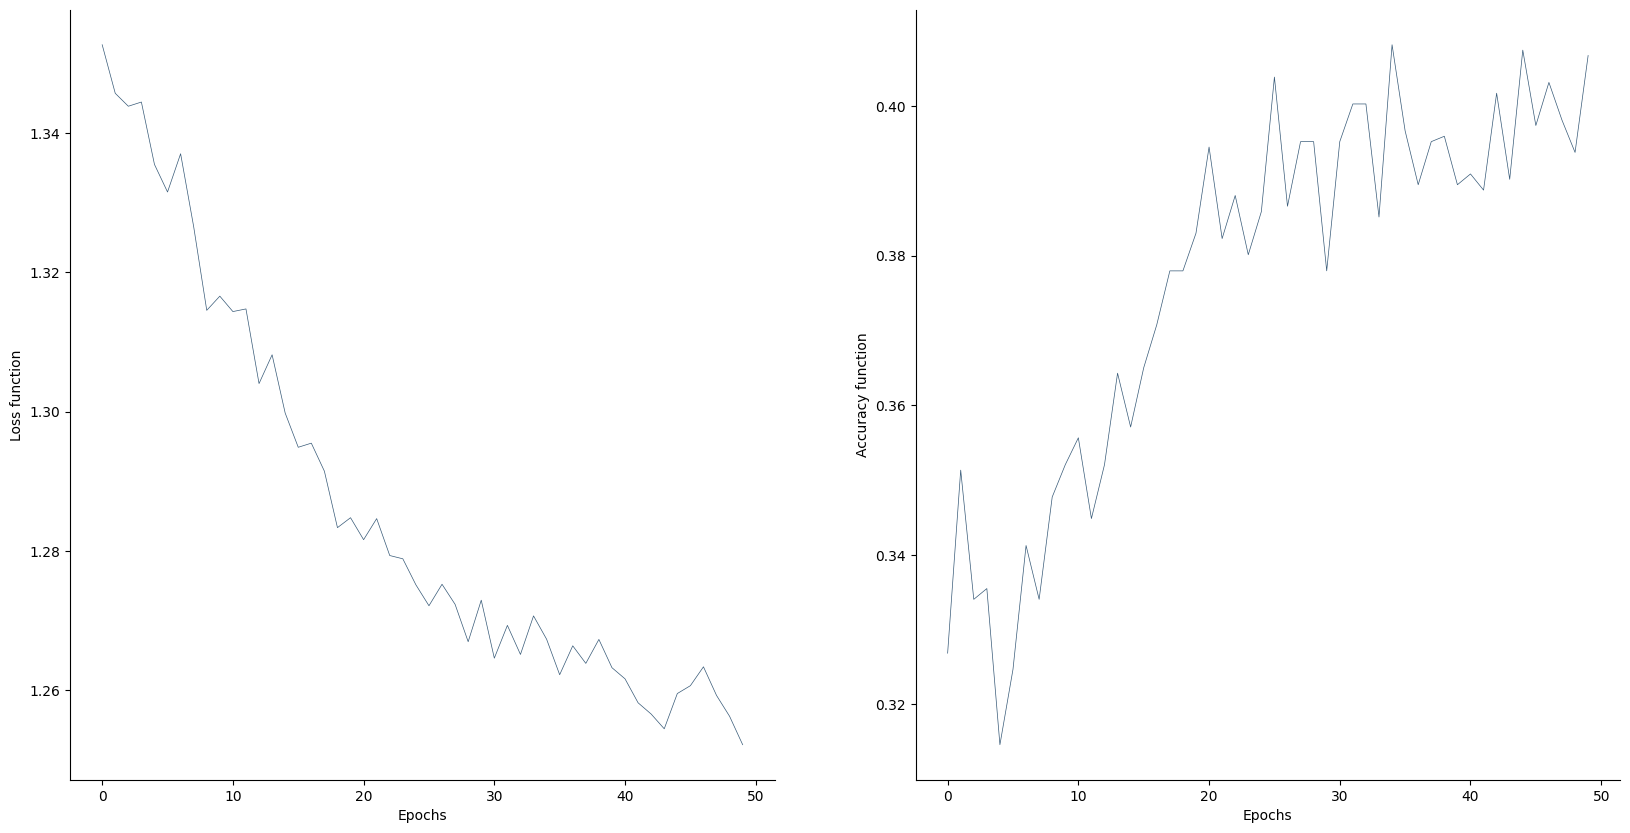

In [201]:
# %% View the training performance

fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(model_history.history['loss'])
plt.xlabel('Epochs'), plt.ylabel('Loss function')
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'), plt.ylabel('Accuracy function')

In [202]:
import graphviz
import pydot
# %% Neural network weights
model_best.layers[0].get_weights()
# model.get_config() #model configuration
# %% View the model
plot_model(model_best)
# plot_model(model, to_file='../figures/P9_fig/model.png', show_shapes=True)
# %% Use the model
# Latest version
Y_prob = model.predict(X_test5)
Y_pred = np.argmax(Y_prob, axis=1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
13/13 [==============================] - 0s 2ms/step


InvalidIndexError: (0, slice(None, None, None))

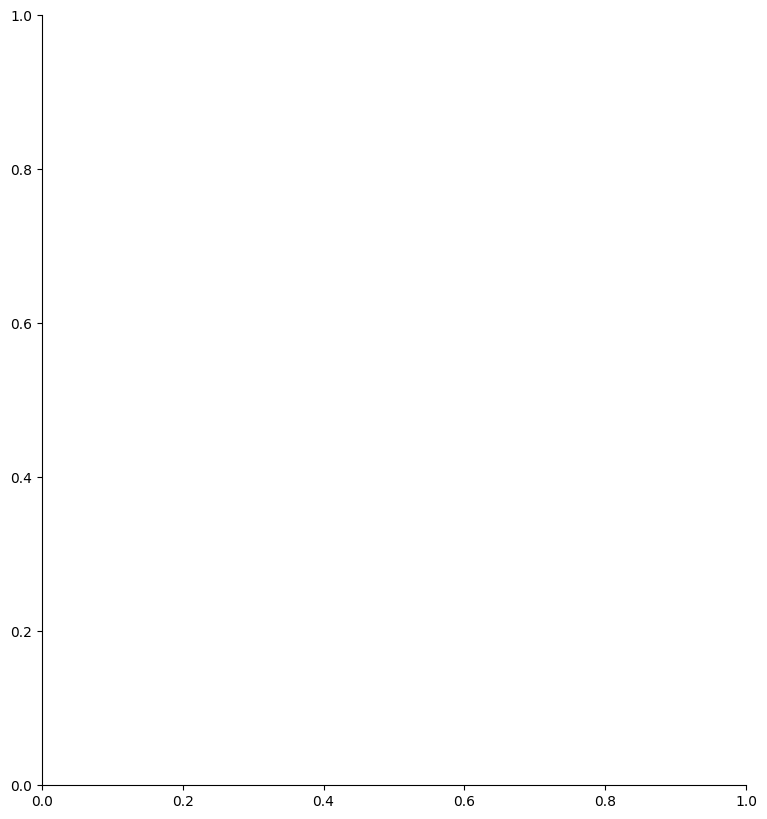

In [203]:
# %% View the neural network prediction
indx = 0
fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(np.reshape(X_test4[indx, :], (8, 8)), cmap=plt.cm.gray_r)
plt.subplot(122)
plt.bar(np.arange(10), Y_prob[indx, :])
plt.ylim([0, 1])
plt.title('Prediction: %d' % np.argmax(Y_prob[indx, :]))

In [204]:
score = model_best.evaluate(X_test4, Y_test_dum, verbose=1)
print(score)

13/13 [==============================] - 0s 1ms/step - loss: 1.3847 - accuracy: 0.2727
[1.3847335577011108, 0.27272728085517883]


In [205]:
# %% More metrics

Yhat_train = np.argmax(model.predict(X_train5), axis=1)
Yhat_test = np.argmax(model.predict(X_test5), axis=1)
accu_train = accuracy_score(y_train5, Yhat_train)
prec_train = precision_score(y_train5, Yhat_train, average='weighted',zero_division = 1)
reca_train = recall_score(y_train5, Yhat_train, average='weighted',zero_division = 1)
accu_test = accuracy_score(y_test5, Yhat_test)
prec_test = precision_score(y_test5, Yhat_test, average='weighted',zero_division = 0)
reca_test = recall_score(y_test5, Yhat_test, average='weighted',zero_division = 0)
print(' \t\t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f' % (accu_train,
                                                                                                            prec_train,
                                                                                                            reca_train,
                                                                                                            accu_test,
                                                                                                            prec_test,
                                                                                                            reca_test))

13/13 [==============================] - 0s 1ms/step
 		 Accu 	 Prec 	 Reca
 Train 	 0.019 	 0.577 	 0.019
  Test 	 0.136 	 0.132 	 0.136


In [206]:
results = {'Accuracy': [accuracy_martingala, accuracy_logistic, accuracy_naive, accuracy_forest],
           'Recall': [recall_martingala, recall_logistic, recall_naive, recall_forest],
           'Precision': [precision_martingala, precision_logistic, precision_naive, precision_forest],
           'F1': [f1_martingala, f1_logistic, f1_naive, f1_forest],
           'Balanced Accuracy': [balanced_martingala, balanced_logistic, balanced_naive, balanced_forest]
           }

table = pd.DataFrame(results, index=['Martingale', 'Logistic Regression', 'Naive Bayes', 'Random Forest'])
print(table)

                      Accuracy     Recall  Precision         F1  \
Martingale           29.248613  29.248613  29.247544  29.248064   
Logistic Regression  20.454545  20.454545   9.888858   9.920318   
Naive Bayes          31.565657  31.565657  30.331704  27.074559   
Random Forest        26.010101  26.010101  32.626474  23.502318   

                     Balanced Accuracy  
Martingale                   28.764071  
Logistic Regression          25.740120  
Naive Bayes                  28.911936  
Random Forest                29.029181  
